# Predicting the risk of Heart Disease 

![plane_image](C:\work\DS\Module 5  Machine Learning\Assigement\istockphoto-1296931945-612x612.jpg)

***

* [A. Introduction](#introduction)
* [B. Importing Libraries](#libraries)
* [C. Importing data](#data)

* [1. MLC1: Data understanding](#data_understanding)
    * [1.1. MLC1.1.: Univariate data analysis](#univariate_data_analysis)
        * [1.1.1. Dataset size](#dataset_size)
        * [1.1.2. Direct visualization of the data](#direct_visualization)
        * [1.1.3. Variable types](#variable_types)
        * [1.1.4. Descriptive statistics](#descriptive_statistics)
        * [1.1.5. Null values](#null_values)
        * [1.1.6. Distribution of target](#target_distribution)
        * [1.1.7-2.1.10. Variables distribution & relations with target](#variables_distribution)
    

  
        
* [2. MLC2: Data preparation](#data_preparation)
    * [2.1. MLC 2.1. Data cleaning](#data_cleaning)
        * [2.1.1. Dealing with variable types](#dealing_variable_types)
        * [´2.1.2. Imputation of null values](#nulls_imputation)
        * [2.1.4. Elimination of features with low variance](#low_variance)
    * [2.2. MLC 2.2. Data transformation](#data_transformation)
        * [2.2.1. Transformation of categorical variables](#transformation_categorical)



* [3. MLC3: Modelling](#modelling)
    * [3.1. MLC 3.1. Data partition and sampling](#dataset_partition)
        * [Random hold hout](#random_holdout)
        * [K-fold cross-validation](#k_fold)
    * [3.2. MLC 3.2. Model definition](#model_definition)
    * [3.3. MLC 3.3. Model optimization](#model_optimization)
        * [3.3.1. Hyperparameter optimization](#hyperparameter_optimization)
        * [3.3.2. Ensemble models](#ensemble_models)


* [5. MLC5: Evaluation](#model_evaluation)

### A.INTRODUCTION<a class="anchor" id="introduction"></a>

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.



*** 

## B. Import LIB <a class="anchor" id="libraries"></a>

we import the 4 mian libraries for ML 

In [648]:
import numpy as np 
import pandas as pd 

# import LIb for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

#import Sciki-learn
from sklearn import preprocessing
from sklearn import __version__ as sklearn_version
print(('the version for scikit-learn: {}.'.format(sklearn_version)))

the version for scikit-learn: 1.0.2.


*** 

## 2C. Importing data<a class="anchor" id="data"></a>

Befor we start to check the ML chicklist, the first step to import the data of (HEART DIESESS )

SHOW The explination of the Indexes of the DATA

In [649]:
# Variable;Explanation;
# HeartDisease;Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI);
# BMI;Body Mass Index (BMI);
# Smoking;Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes];
# AlcoholDrinking;Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week;
# Stroke;(Ever told) (you had) a stroke?;
# PhysicalHealth;Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days);
# MentalHealth;Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days);
# DiffWalking;Do you have serious difficulty walking or climbing stairs?;
# Sex;Are you male or female?;
# AgeCategory;Fourteen-level age category;
# Race;Imputed race/ethnicity value;
# Diabetic;(Ever told) (you had) diabetes?;
# PhysicalActivity;Adults who reported doing physical activity or exercise during the past 30 days other than their regular job;
# GenHealth;Would you say that in general your health is Good/Very Good/…;
# SleepTime;On average, how many hours of sleep do you get in a 24-hour period?;
# Asthma;(Ever told) (you had) asthma?;
# KidneyDisease;Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?;
# SkinCancer;(Ever told) (you had) skin cancer?;
# HeartDisease_FamilyHistory;Do you have family history of heart disease? ;
# State;US sate (residency) ;

We import the Data and PRINT the first 10 rows and 10 last rows 

In [650]:
df_heart=pd.read_csv('C:\work\DS\Module 5  Machine Learning\Assigement\heart_disease_project_data\heart_disease_project_data\heart_disease_data.csv')
df_heart.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,No,16.60,Yes,No,No,3.00,30.00,No,Female,55-59,White,Yes,Yes,Very good,5.00,Yes,No,Yes,No,MT
1,No,20.34,No,NaN,Yes,0.00,0.00,No,Female,80 or older,White,No,Yes,Very good,7.00,No,No,No,NaN,VT
2,No,26.58,Yes,NaN,No,20.00,30.00,No,Male,65-69,White,Yes,Yes,Fair,8.00,Yes,No,No,NaN,WY
3,No,24.21,No,NaN,No,0.00,0.00,No,Female,75-79,White,No,No,Good,6.00,No,No,Yes,No,VT
4,No,23.71,No,No,No,28.00,0.00,Yes,Female,40-44,White,No,Yes,Very good,8.00,No,No,No,NaN,DC
5,Yes,28.87,Yes,No,No,6.00,0.00,Yes,Female,75-79,Black,No,No,Fair,12.00,No,No,No,NaN,PA
6,No,21.63,No,No,No,15.00,0.00,No,Female,70-74,White,No,Yes,Fair,4.00,Yes,No,Yes,NaN,AK
7,No,31.64,Yes,No,No,5.00,0.00,Yes,Female,80 or older,White,Yes,No,Good,9.00,Yes,No,No,NaN,KY
8,No,26.45,No,No,No,0.00,0.00,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.00,No,Yes,No,NaN,MT
9,No,40.69,No,No,No,0.00,0.00,Yes,Male,65-69,White,No,Yes,Good,10.00,No,No,No,NaN,DE


In [651]:
df_heart.tail(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
319785,No,31.93,No,Yes,No,0.00,0.00,No,Male,65-69,Hispanic,No,Yes,Good,7.00,No,No,No,NaN,DE
319786,Yes,33.20,Yes,No,No,0.00,0.00,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.00,Yes,No,NaN,NaN,NY
319787,No,36.54,No,No,No,7.00,0.00,No,Male,30-34,Hispanic,No,No,Good,9.00,No,No,No,NaN,VA
319788,No,23.38,No,No,No,0.00,0.00,No,Female,60-64,Hispanic,No,Yes,Excellent,6.00,No,No,No,No,KS
319789,No,22.22,No,NaN,No,0.00,0.00,No,Female,18-24,Hispanic,No,Yes,Excellent,8.00,No,No,No,NaN,IL
319790,Yes,27.41,Yes,No,No,7.00,0.00,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.00,Yes,No,No,NaN,AZ
319791,No,29.84,Yes,NaN,No,0.00,0.00,No,Male,35-39,Hispanic,No,Yes,Very good,5.00,Yes,No,No,No,NH
319792,No,24.24,No,No,No,0.00,0.00,No,Female,45-49,Hispanic,No,Yes,Good,6.00,No,No,No,NaN,DE
319793,No,32.81,No,NaN,No,0.00,0.00,No,Female,25-29,Hispanic,No,No,Good,12.00,No,No,No,NaN,UT
319794,No,46.56,No,NaN,No,0.00,0.00,No,Female,80 or older,Hispanic,No,Yes,Good,8.00,No,No,No,NaN,OR


In [652]:
df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,"319,795.00",28.33,6.37,12.02,24.03,27.34,31.44,119.00
PhysicalHealth,"319,795.00",3.37,7.95,0.00,0.00,0.00,2.00,30.00
MentalHealth,"319,795.00",3.90,7.96,0.00,0.00,0.00,3.00,30.00
SleepTime,"319,795.00",7.10,1.44,1.00,6.00,7.00,8.00,24.00


In [653]:
df_heart.reset_index(drop=True, inplace=True)
df_heart


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,No,16.60,Yes,No,No,3.00,30.00,No,Female,55-59,White,Yes,Yes,Very good,5.00,Yes,No,Yes,No,MT
1,No,20.34,No,NaN,Yes,0.00,0.00,No,Female,80 or older,White,No,Yes,Very good,7.00,No,No,No,NaN,VT
2,No,26.58,Yes,NaN,No,20.00,30.00,No,Male,65-69,White,Yes,Yes,Fair,8.00,Yes,No,No,NaN,WY
3,No,24.21,No,NaN,No,0.00,0.00,No,Female,75-79,White,No,No,Good,6.00,No,No,Yes,No,VT
4,No,23.71,No,No,No,28.00,0.00,Yes,Female,40-44,White,No,Yes,Very good,8.00,No,No,No,NaN,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.00,0.00,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.00,Yes,No,No,NaN,AZ
319791,No,29.84,Yes,NaN,No,0.00,0.00,No,Male,35-39,Hispanic,No,Yes,Very good,5.00,Yes,No,No,No,NH
319792,No,24.24,No,No,No,0.00,0.00,No,Female,45-49,Hispanic,No,Yes,Good,6.00,No,No,No,NaN,DE
319793,No,32.81,No,NaN,No,0.00,0.00,No,Female,25-29,Hispanic,No,No,Good,12.00,No,No,No,NaN,UT


***

## MLC_1:Data Understanding<a class="anchor" id="data_understanding"></a>

### 1.1. Data size 

we use .info() to explore the basic info of the Dataset 

In [654]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease                319795 non-null  object 
 1   BMI                         319795 non-null  float64
 2   Smoking                     319795 non-null  object 
 3   AlcoholDrinking             212984 non-null  object 
 4   Stroke                      318683 non-null  object 
 5   PhysicalHealth              319795 non-null  float64
 6   MentalHealth                319795 non-null  float64
 7   DiffWalking                 319795 non-null  object 
 8   Sex                         319795 non-null  object 
 9   AgeCategory                 319795 non-null  object 
 10  Race                        319795 non-null  object 
 11  Diabetic                    319795 non-null  object 
 12  PhysicalActivity            319795 non-null  object 
 13  GenHealth     

***

### 1.2. Dirct visulization of the data

df.coloumns to prin the the lis of the coloumns 

In [655]:
df_heart.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease_FamilyHistory',
       'State'],
      dtype='object')

In [656]:
df_heart.head(4).T

,0,1,2,3
HeartDisease,No,No,No,No
BMI,16.60,20.34,26.58,24.21
Smoking,Yes,No,Yes,No
AlcoholDrinking,No,NaN,NaN,NaN
Stroke,No,Yes,No,No
PhysicalHealth,3.00,0.00,20.00,0.00
MentalHealth,30.00,0.00,30.00,0.00
DiffWalking,No,No,No,No
Sex,Female,Female,Male,Female
AgeCategory,55-59,80 or older,65-69,75-79


We need to understand the data and well check shape of HeartDisease 

In [657]:
print("Total number of rows in the dataframe: ",df_heart.shape[0])


Total number of rows in the dataframe:  319795


In [658]:
print("Number of unique on Datafram ", df_heart.drop_duplicates().shape[0])

Number of unique on Datafram  319541


In [659]:
df_heart.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease_FamilyHistory',
       'State'],
      dtype='object')

In [660]:
df_heart.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Columns: 20 entries, HeartDisease to State
dtypes: float64(4), object(16)
memory usage: 48.8+ MB


***

### 1.3. Types of variables available<a class="anchor" id="variable_types"></a>

In [661]:
df_heart.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease                319795 non-null  object 
 1   BMI                         319795 non-null  float64
 2   Smoking                     319795 non-null  object 
 3   AlcoholDrinking             212984 non-null  object 
 4   Stroke                      318683 non-null  object 
 5   PhysicalHealth              319795 non-null  float64
 6   MentalHealth                319795 non-null  float64
 7   DiffWalking                 319795 non-null  object 
 8   Sex                         319795 non-null  object 
 9   AgeCategory                 319795 non-null  object 
 10  Race                        319795 non-null  object 
 11  Diabetic                    319795 non-null  object 
 12  PhysicalActivity            319795 non-null  object 
 13  GenHealth     

***

### 1.4. Descriptive statistics<a class="anchor" id="descriptive_statistics"></a>

In [662]:
df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,"319,795.00",28.33,6.37,12.02,24.03,27.34,31.44,119.00
PhysicalHealth,"319,795.00",3.37,7.95,0.00,0.00,0.00,2.00,30.00
MentalHealth,"319,795.00",3.90,7.96,0.00,0.00,0.00,3.00,30.00
SleepTime,"319,795.00",7.10,1.44,1.00,6.00,7.00,8.00,24.00


In [663]:
df_heart.describe(include=['object']).T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,212984,2,No,191207
Stroke,318683,2,No,306614
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,14,65-69,34143
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


***

### 1.5. Number/fractions of null values<a class="anchor" id="null_values"></a>

In [664]:
df_heart.select_dtypes(include=['number']).isnull().sum()

BMI               0
PhysicalHealth    0
MentalHealth      0
SleepTime         0
dtype: int64

In [665]:
df_heart.select_dtypes(include=['object']).isnull().sum()

HeartDisease                       0
Smoking                            0
AlcoholDrinking               106811
Stroke                          1112
DiffWalking                        0
Sex                                0
AgeCategory                        0
Race                               0
Diabetic                           0
PhysicalActivity                   0
GenHealth                          0
Asthma                             0
KidneyDisease                      0
SkinCancer                       349
HeartDisease_FamilyHistory    284532
State                              0
dtype: int64

***

### 1.6. Distribution / range of target values<a class="anchor" id="target_distribution"></a>

In [666]:
df_heart['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [667]:
print('This is a DataFrame')
print(type(df_heart[['HeartDisease']]))
df_heart[['HeartDisease']].head(10)

This is a DataFrame
<class 'pandas.core.frame.DataFrame'>


,HeartDisease
0,No
1,No
2,No
3,No
4,No
5,Yes
6,No
7,No
8,No
9,No


In [668]:
print('This is a Series')
print(type(df_heart['HeartDisease']))
df_heart['HeartDisease'].head()

This is a Series
<class 'pandas.core.series.Series'>


0    No
1    No
2    No
3    No
4    No
Name: HeartDisease, dtype: object

<AxesSubplot:title={'center':'HEART DISEASE DISTRIBUTION'}, ylabel='HeartDisease'>

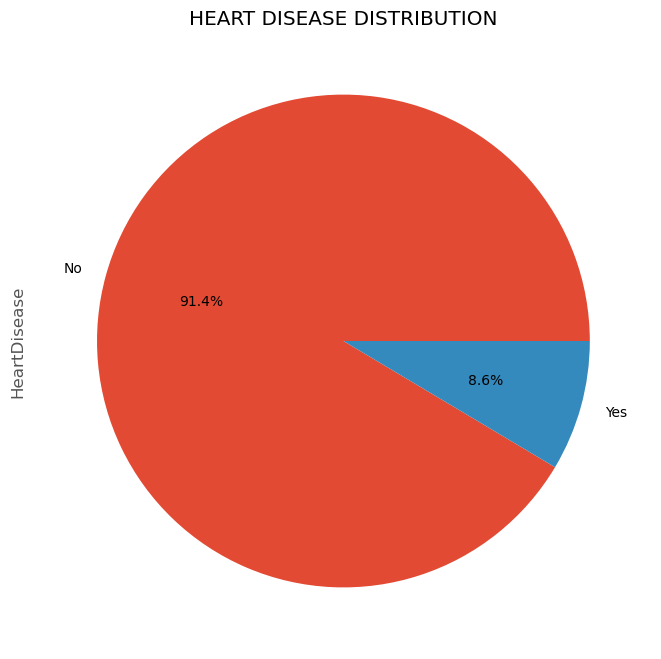

In [669]:
plt.title('HEART DISEASE DISTRIBUTION')
df_heart['HeartDisease'].value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8))

convert'HeartDisease' from object to intger as yes=1 and no=0

In [670]:
df_heart.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,No,16.60,Yes,No,No,3.00,30.00,No,Female,55-59,White,Yes,Yes,Very good,5.00,Yes,No,Yes,No,MT
1,No,20.34,No,NaN,Yes,0.00,0.00,No,Female,80 or older,White,No,Yes,Very good,7.00,No,No,No,NaN,VT
2,No,26.58,Yes,NaN,No,20.00,30.00,No,Male,65-69,White,Yes,Yes,Fair,8.00,Yes,No,No,NaN,WY
3,No,24.21,No,NaN,No,0.00,0.00,No,Female,75-79,White,No,No,Good,6.00,No,No,Yes,No,VT
4,No,23.71,No,No,No,28.00,0.00,Yes,Female,40-44,White,No,Yes,Very good,8.00,No,No,No,NaN,DC
5,Yes,28.87,Yes,No,No,6.00,0.00,Yes,Female,75-79,Black,No,No,Fair,12.00,No,No,No,NaN,PA
6,No,21.63,No,No,No,15.00,0.00,No,Female,70-74,White,No,Yes,Fair,4.00,Yes,No,Yes,NaN,AK
7,No,31.64,Yes,No,No,5.00,0.00,Yes,Female,80 or older,White,Yes,No,Good,9.00,Yes,No,No,NaN,KY
8,No,26.45,No,No,No,0.00,0.00,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.00,No,Yes,No,NaN,MT
9,No,40.69,No,No,No,0.00,0.00,Yes,Male,65-69,White,No,Yes,Good,10.00,No,No,No,NaN,DE


***

### 1.7. Variables distribution and relations with target<a class="anchor" id="variables_distribution"></a>

 Visualization Of Categorical Features
 - Smoking
 - AlcoholDrinking
 - Stroke
 - Sex
 - AgeCategory
 - Race
 - PhysicalActivity
 - Diabetic
 - Asthma
 - KidneyDisease
 - SkinCancer


1.7.1 first we start to look and how many number of Heart disease cross with Smoking  

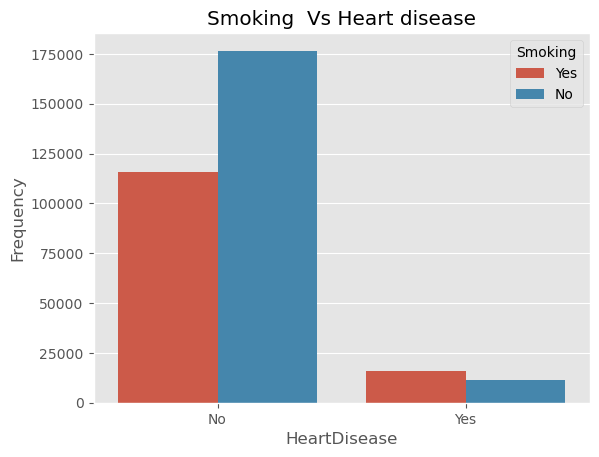

In [671]:
plt.title('Smoking  Vs Heart disease')
sns.countplot(x=df_heart['HeartDisease'],hue=df_heart['Smoking'])
plt.ylabel("Frequency")
plt.show()


1.7.2 We check the relation with Alcohol Drinking

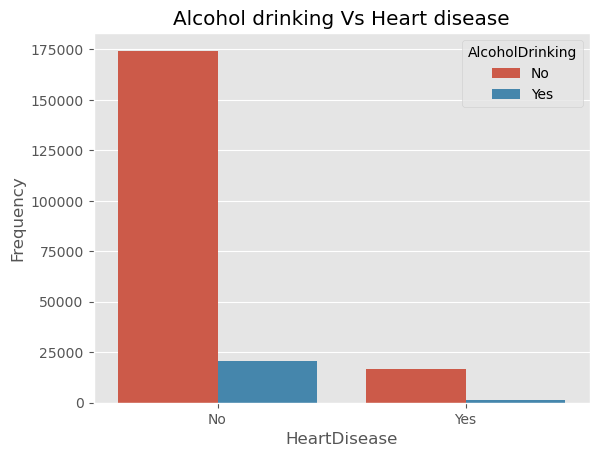

In [672]:
plt.title('Alcohol drinking Vs Heart disease')
sns.countplot(x=df_heart['HeartDisease'],hue=df_heart['AlcoholDrinking'])
plt.ylabel("Frequency")
plt.show()

summery:

As showen on abve graph the persentage of people who
- do not drink Alcohol and do not have heart diesases more higher then who who drink Alcohol 
- As well the people who drink Alcohol and do not have heart disease more higher than who drink and have heart disease

So. The as we understand from the graph the Alcohol has a big IMPACT on the health of HEART 

1.7.3 We check the relation with Stroke

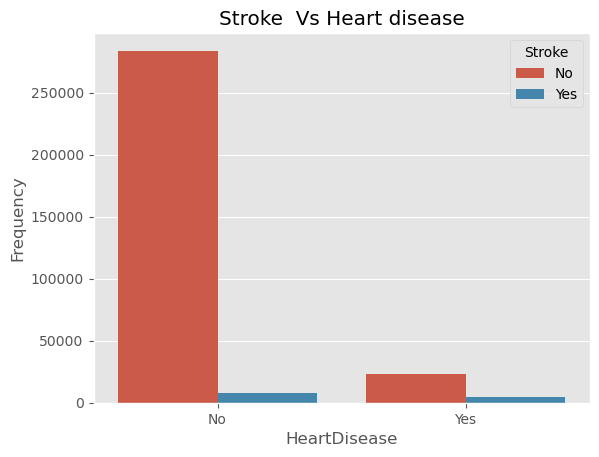

In [673]:
plt.title('Stroke  Vs Heart disease')
sns.countplot(x=df_heart['HeartDisease'],hue=df_heart['Stroke'])
plt.ylabel("Frequency")
plt.show()

1.7.5  We check the relation with Sex 

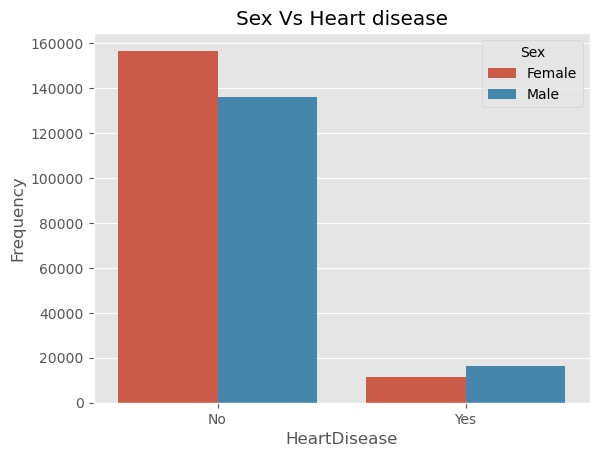

In [674]:
plt.title('Sex Vs Heart disease')
sns.countplot(x=df_heart['HeartDisease'],hue=df_heart['Sex'])
plt.ylabel("Frequency")
plt.show()

1.7.5  We check the relation with AgeCategory  

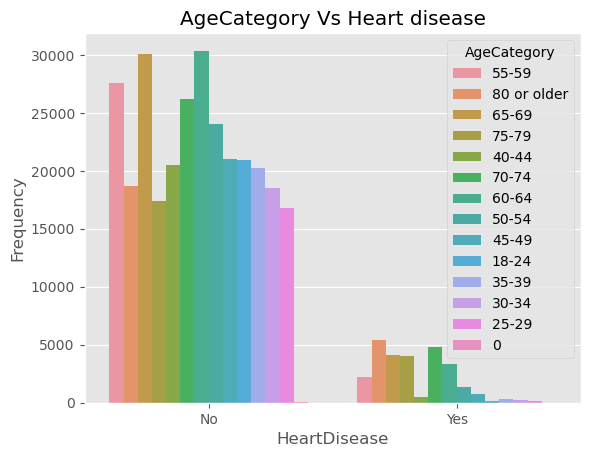

In [675]:
plt.title('AgeCategory Vs Heart disease')
sns.countplot(x=df_heart['HeartDisease'],hue=df_heart['AgeCategory'])
plt.ylabel("Frequency")
plt.show()

1.7.6  We check the relation with Race

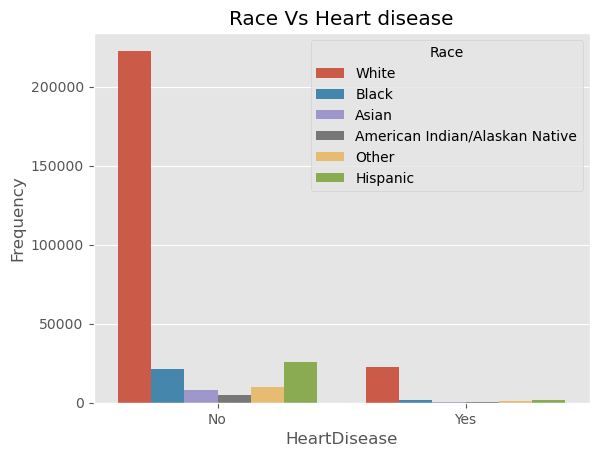

In [676]:
plt.title('Race Vs Heart disease')
sns.countplot(x=df_heart['HeartDisease'],hue=df_heart['Race'])
plt.ylabel("Frequency")
plt.show()

1.7.3 We check the relation with Physical Health

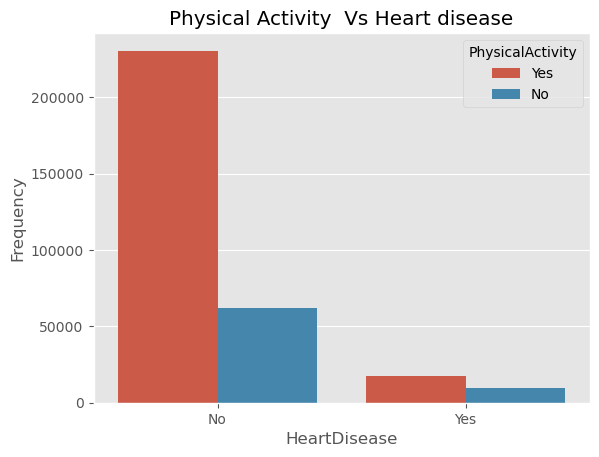

In [677]:
plt.title('Physical Activity  Vs Heart disease')
sns.countplot(x=df_heart['HeartDisease'],hue=df_heart['PhysicalActivity'])
plt.ylabel("Frequency")
plt.show()

summery:

As showen on abve graph the persentage of 
People who have  exercise have a very high rate of not getting heart disease

1.7.4  We check the relation with Diabetic  

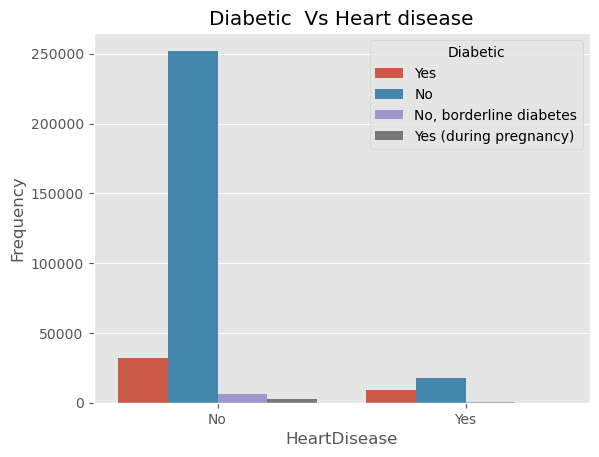

In [678]:
plt.title('Diabetic  Vs Heart disease')
sns.countplot(x=df_heart['HeartDisease'],hue=df_heart['Diabetic'])
plt.ylabel("Frequency")
plt.show()

DONT FORGET TO WRITE SUMMRY 

1.7.4  We check the relation with Athema  

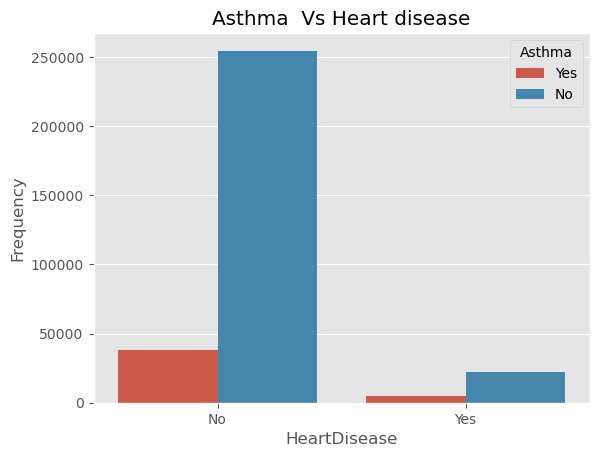

In [679]:
plt.title('Asthma  Vs Heart disease')
sns.countplot(x=df_heart['HeartDisease'],hue=df_heart['Asthma'])
plt.ylabel("Frequency")
plt.show()

1.7.4  We check the relation with KidneyDisease  

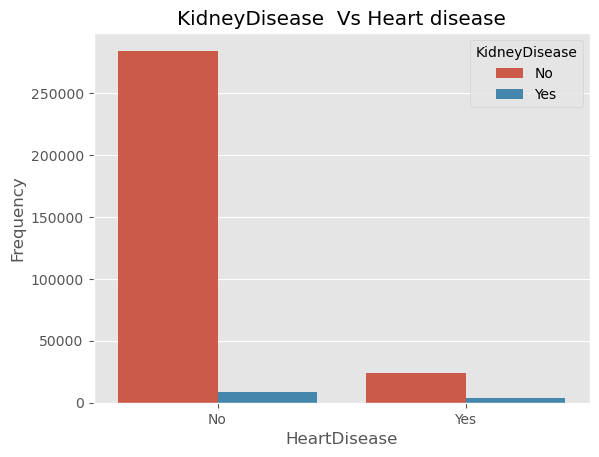

In [680]:
plt.title('KidneyDisease  Vs Heart disease')
sns.countplot(x=df_heart['HeartDisease'],hue=df_heart['KidneyDisease'])
plt.ylabel("Frequency")
plt.show()

1.7.4  We check the relation with SkinCancer  

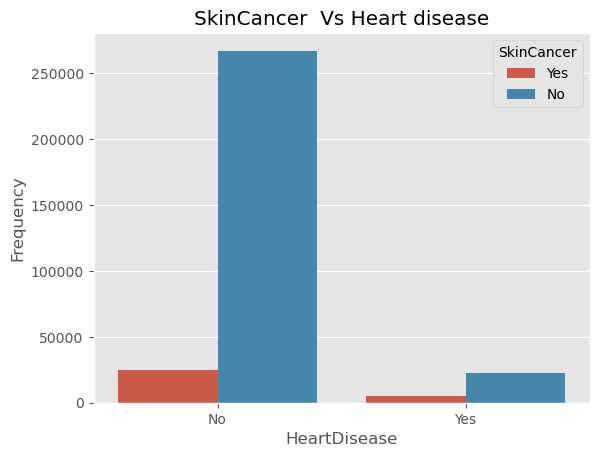

In [681]:
plt.title('SkinCancer  Vs Heart disease')
sns.countplot(x=df_heart['HeartDisease'],hue=df_heart['SkinCancer'])
plt.ylabel("Frequency")
plt.show()

In [682]:
df_heart.head(1)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,No,16.60,Yes,No,No,3.00,30.00,No,Female,55-59,White,Yes,Yes,Very good,5.00,Yes,No,Yes,No,MT


 Visualization Of Numrical Features
 - BMI
 - PhysicalHealth
 - MentalHealth
 - SleepTime


WE Transform the HeartDisease Values yes=1 and No=0 to use use the Numrical dis. 

In [683]:
df_heart =  df_heart[df_heart.columns].replace({'Yes':1, 'No':0})

-1- check the relation the Heart Disease with BMI   

C:\Users\shady\AppData\Local\Temp\ipykernel_3056\1730305980.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_heart[df_heart["HeartDisease"]==1]["BMI"], alpha=0.5, color="Blue", label="HeartDisease", shade=True)
C:\Users\shady\AppData\Local\Temp\ipykernel_3056\1730305980.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_heart[df_heart["HeartDisease"]==0]["BMI"], alpha=0.5, color="#fc8a80", label="Normal", shade= True)


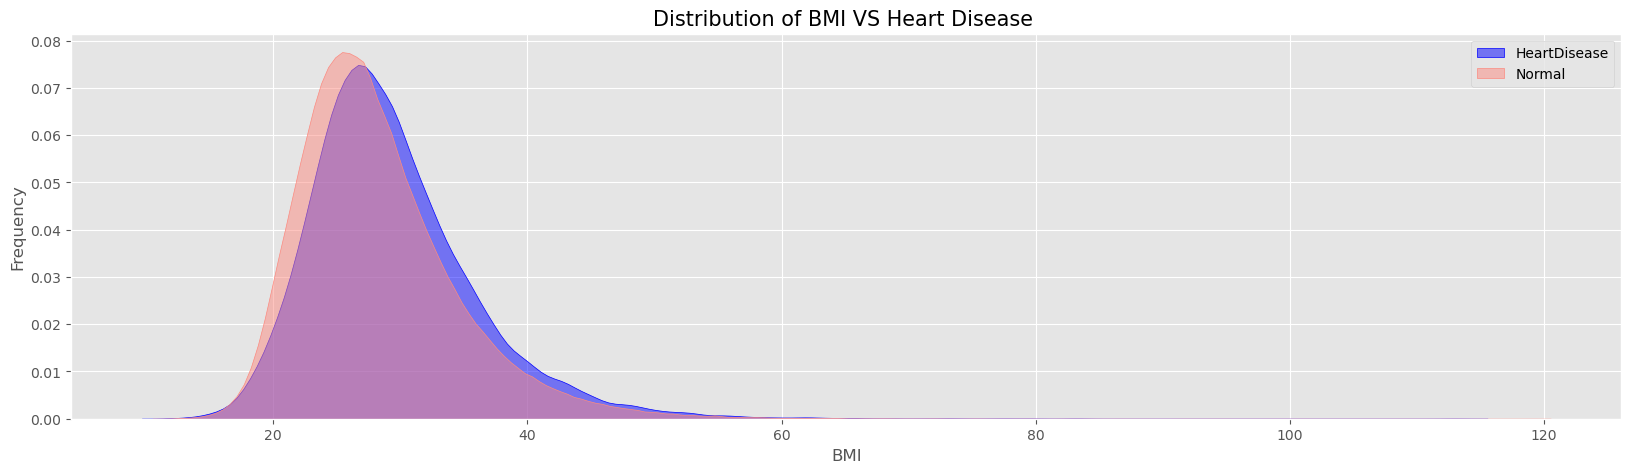

NOTE: The Normal BMI is between 18,5 to 24,9 


In [684]:
fig, x= plt.subplots(figsize = (20,5))
sns.kdeplot(df_heart[df_heart["HeartDisease"]==1]["BMI"], alpha=0.5, color="Blue", label="HeartDisease", shade=True)
sns.kdeplot(df_heart[df_heart["HeartDisease"]==0]["BMI"], alpha=0.5, color="#fc8a80", label="Normal", shade= True)
plt.title('Distribution of BMI VS Heart Disease ', fontsize = 15)
x.set_xlabel("BMI")
x.set_ylabel("Frequency")
x.legend();
plt.show()
print('NOTE: The Normal BMI is between 18,5 to 24,9 ')

-2- check the relation the Heart Disease with PhysicalHealth 

C:\Users\shady\AppData\Local\Temp\ipykernel_3056\1748396081.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_heart[df_heart["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5, color="Blue", label="HeartDisease", shade=True)
C:\Users\shady\AppData\Local\Temp\ipykernel_3056\1748396081.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_heart[df_heart["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5, color="#fc8a80", label="Normal", shade= True)


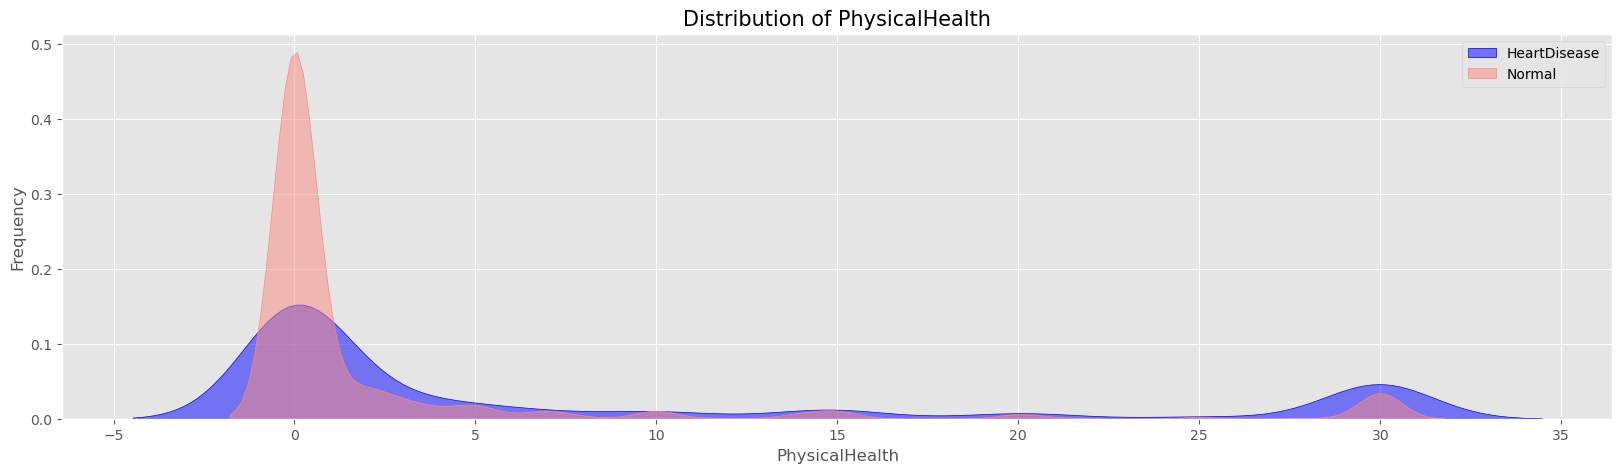

In [685]:
fig, x= plt.subplots(figsize = (20,5))
sns.kdeplot(df_heart[df_heart["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5, color="Blue", label="HeartDisease", shade=True)
sns.kdeplot(df_heart[df_heart["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5, color="#fc8a80", label="Normal", shade= True)
plt.title('Distribution of PhysicalHealth', fontsize = 15)
x.set_xlabel("PhysicalHealth")
x.set_ylabel("Frequency")
x.legend();
plt.show()

-3- check the relation the Heart Disease with MentalHealth

C:\Users\shady\AppData\Local\Temp\ipykernel_3056\4044377630.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_heart[df_heart["HeartDisease"]==1]["MentalHealth"], alpha=0.5, color="Blue", label="HeartDisease", shade=True)
C:\Users\shady\AppData\Local\Temp\ipykernel_3056\4044377630.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_heart[df_heart["HeartDisease"]==0]["MentalHealth"], alpha=0.5, color="#fc8a80", label="Normal", shade= True)


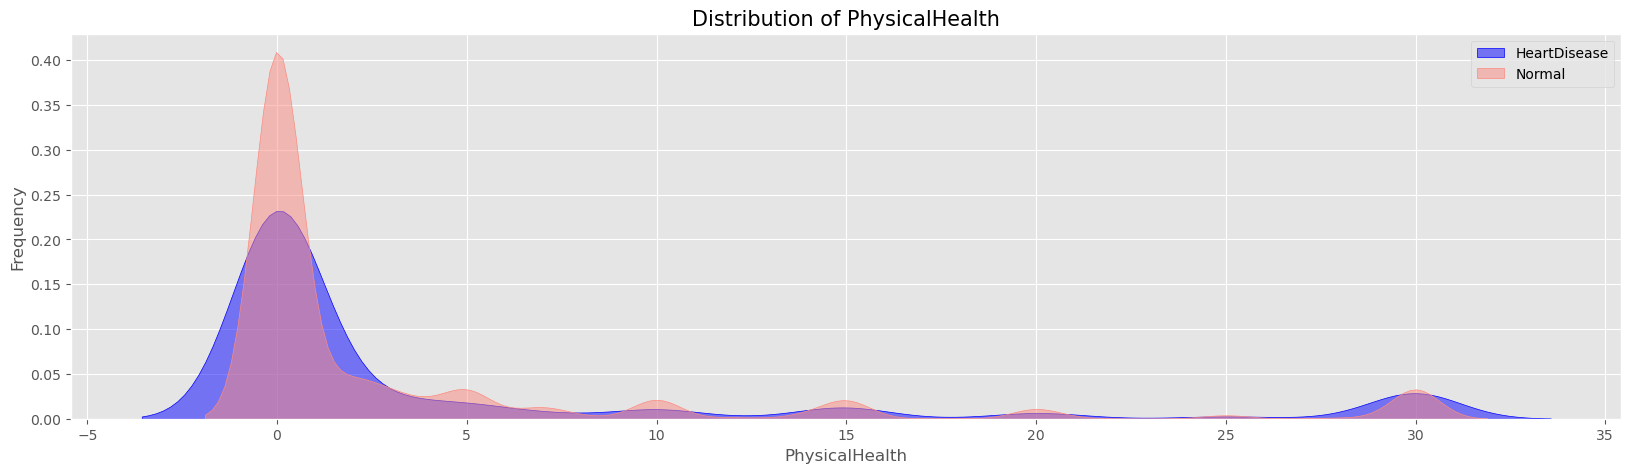

In [686]:
fig, x= plt.subplots(figsize = (20,5))
sns.kdeplot(df_heart[df_heart["HeartDisease"]==1]["MentalHealth"], alpha=0.5, color="Blue", label="HeartDisease", shade=True)
sns.kdeplot(df_heart[df_heart["HeartDisease"]==0]["MentalHealth"], alpha=0.5, color="#fc8a80", label="Normal", shade= True)
plt.title('Distribution of PhysicalHealth', fontsize = 15)
x.set_xlabel("PhysicalHealth")
x.set_ylabel("Frequency")
x.legend();
plt.show()

-4- check the relation the Heart Disease with Sleep time

C:\Users\shady\AppData\Local\Temp\ipykernel_3056\2080525231.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_heart[df_heart["HeartDisease"]==1]["SleepTime"], alpha=0.5, color="Blue", label="HeartDisease", shade=True)
C:\Users\shady\AppData\Local\Temp\ipykernel_3056\2080525231.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_heart[df_heart["HeartDisease"]==0]["SleepTime"], alpha=0.5, color="#fc8a80", label="Normal", shade= True)


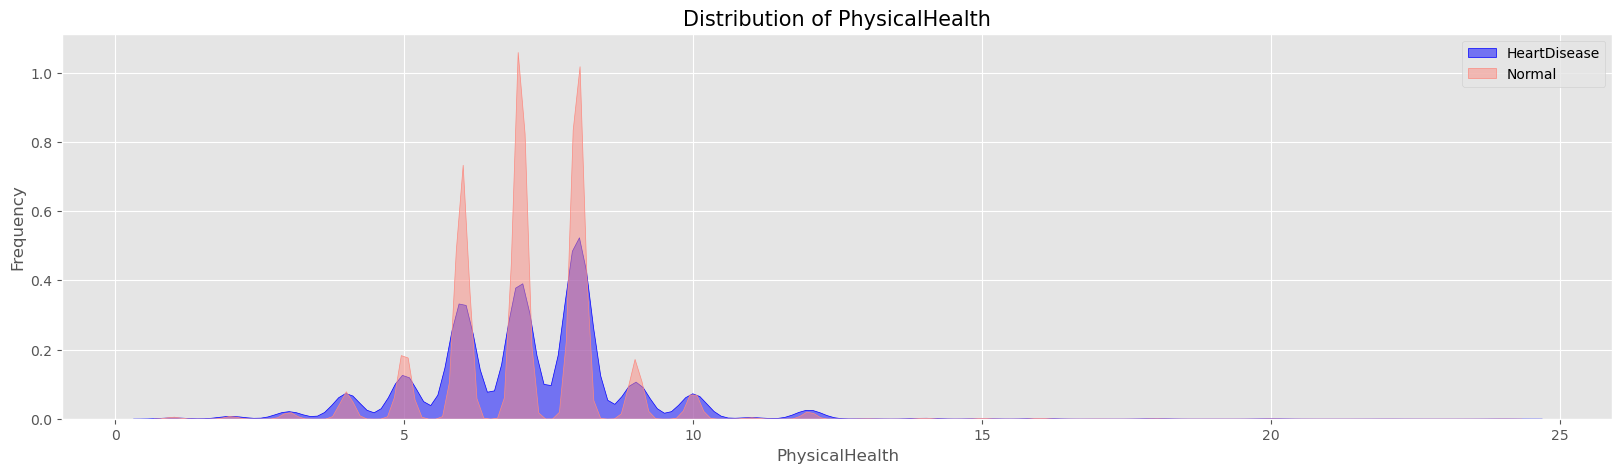

In [687]:
fig, x= plt.subplots(figsize = (20,5))
sns.kdeplot(df_heart[df_heart["HeartDisease"]==1]["SleepTime"], alpha=0.5, color="Blue", label="HeartDisease", shade=True)
sns.kdeplot(df_heart[df_heart["HeartDisease"]==0]["SleepTime"], alpha=0.5, color="#fc8a80", label="Normal", shade= True)
plt.title('Distribution of PhysicalHealth', fontsize = 15)
x.set_xlabel("PhysicalHealth")
x.set_ylabel("Frequency")
x.legend();
plt.show()

***

## MLC2: Data Preparation<a class="anchor" id="data_preparation"></a>

Keep a copy of the original dataframe (Better to do so do not mess the orginal data)

In [688]:
df_heart_co=df_heart.copy()
df_heart_co.head(1)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,0,16.60,1,0.00,0.00,3.00,30.00,0,Female,55-59,White,1,1,Very good,5.00,1,0,1.00,0.00,MT


### MLC2.1: Data Cleaning<a class="anchor" id="data_cleaning"></a>

### 2.1.1. Dealing with variable types<a class="anchor" id="dealing_variable_types"></a>

#### From numeric to categorical

Decision trees need variables in a numeric format. However, there are caes in which numeric variables do not have an ordinal interpretation. These variables need to be transformed in order for them to be handled as a categorical variable. 

so Far the DATA we have is oki and no need to change anything 


In [689]:
df_heart_co.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Sex,319795,2,Female,167805
AgeCategory,319795,14,65-69,34143
Race,319795,6,White,245212
Diabetic,319795,4,0,269653
GenHealth,319795,5,Very good,113858
State,319795,51,OH,6429


### 2.1.2. Imputation of null values<a class="anchor" id="nulls_imputation"></a>

#### Imputation of null values in categorical variables

First need to find the variables with null values and numbers of null value at each variable 

In [690]:
df_heart_co.select_dtypes(include=['object']).isnull().sum()

Sex            0
AgeCategory    0
Race           0
Diabetic       0
GenHealth      0
State          0
dtype: int64

##### Imputation of null values in categorical variables 

use FILLNA to replace null values

In [691]:
df_heart_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease                319795 non-null  int64  
 1   BMI                         319795 non-null  float64
 2   Smoking                     319795 non-null  int64  
 3   AlcoholDrinking             212984 non-null  float64
 4   Stroke                      318683 non-null  float64
 5   PhysicalHealth              319795 non-null  float64
 6   MentalHealth                319795 non-null  float64
 7   DiffWalking                 319795 non-null  int64  
 8   Sex                         319795 non-null  object 
 9   AgeCategory                 319795 non-null  object 
 10  Race                        319795 non-null  object 
 11  Diabetic                    319795 non-null  object 
 12  PhysicalActivity            319795 non-null  int64  
 13  GenHealth     

The persentage of missing values 

In [692]:
for column in df_heart.columns:
  total_values = len(df_heart)
  missing_values = df_heart[column].isnull().sum()
  percentage = ((missing_values/total_values)*100).round(2)
  print('Column {} with {} missing values, {}% of {} values'.format(column, missing_values, percentage, total_values))

Column HeartDisease with 0 missing values, 0.0% of 319795 values
Column BMI with 0 missing values, 0.0% of 319795 values
Column Smoking with 0 missing values, 0.0% of 319795 values
Column AlcoholDrinking with 106811 missing values, 33.4% of 319795 values
Column Stroke with 1112 missing values, 0.35% of 319795 values
Column PhysicalHealth with 0 missing values, 0.0% of 319795 values
Column MentalHealth with 0 missing values, 0.0% of 319795 values
Column DiffWalking with 0 missing values, 0.0% of 319795 values
Column Sex with 0 missing values, 0.0% of 319795 values
Column AgeCategory with 0 missing values, 0.0% of 319795 values
Column Race with 0 missing values, 0.0% of 319795 values
Column Diabetic with 0 missing values, 0.0% of 319795 values
Column PhysicalActivity with 0 missing values, 0.0% of 319795 values
Column GenHealth with 0 missing values, 0.0% of 319795 values
Column SleepTime with 0 missing values, 0.0% of 319795 values
Column Asthma with 0 missing values, 0.0% of 319795 val

In [693]:
df_heart_co['AlcoholDrinking'].fillna(value=0, inplace=True)
# we replace the NAN to to the mean value of AlcoholDrinking

In [694]:
St_mean=df_heart_co['Stroke'].mean()

In [695]:
df_heart_co['Stroke'].fillna(value=St_mean, inplace=True)

In [696]:
# SkinCancer with 349 missing values, 0.11% of 319795 values so we can drop this small amout of NAN
df_heart_co['SkinCancer'].dropna(inplace=True)

In [697]:
# Because the NAN of Family history is 88 % it mean almost all values are NAN, So, for better predection we drop it 
df_hear_co= df_heart_co.drop('HeartDisease_FamilyHistory', axis=1, inplace=True)

In [698]:
df_heart_co.select_dtypes(include=['object']).isnull().sum()

Sex            0
AgeCategory    0
Race           0
Diabetic       0
GenHealth      0
State          0
dtype: int64

As showen the all catogirval data have no null values 

#### Imputation of null values in numeric variables

In [699]:
df_heart_co.select_dtypes(include=['number']).isnull().sum()

HeartDisease          0
BMI                   0
Smoking               0
AlcoholDrinking       0
Stroke                0
PhysicalHealth        0
MentalHealth          0
DiffWalking           0
PhysicalActivity      0
SleepTime             0
Asthma                0
KidneyDisease         0
SkinCancer          349
dtype: int64

As showen the all catogirval data have no null values 

#### The final of our data sit after fill the null values

In [700]:
df_heart_co.head().T

,0,1,2,3,4
HeartDisease,0,0,0,0,0
BMI,16.60,20.34,26.58,24.21,23.71
Smoking,1,0,1,0,0
AlcoholDrinking,0.00,0.00,0.00,0.00,0.00
Stroke,0.00,1.00,0.00,0.00,0.00
PhysicalHealth,3.00,0.00,20.00,0.00,28.00
MentalHealth,30.00,0.00,30.00,0.00,0.00
DiffWalking,0,0,0,0,1
Sex,Female,Female,Male,Female,Female
AgeCategory,55-59,80 or older,65-69,75-79,40-44


***

### MLC2.2: Data transformation<a class="anchor" id="data_transformation"></a>
### 2.2.1 Transformation of categorical variables<a class="anchor" id="transformation_categorical"></a>

In [701]:
df_heart_co.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Sex,319795,2,Female,167805
AgeCategory,319795,14,65-69,34143
Race,319795,6,White,245212
Diabetic,319795,4,0,269653
GenHealth,319795,5,Very good,113858
State,319795,51,OH,6429


#### 2.2.1.1 One hot coding 

Show the Data set agian and define which column or cat. have an effect oh heart Disase

In [702]:
df_heart_co

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,State
0,0,16.60,1,0.00,0.00,3.00,30.00,0,Female,55-59,White,1,1,Very good,5.00,1,0,1.00,MT
1,0,20.34,0,0.00,1.00,0.00,0.00,0,Female,80 or older,White,0,1,Very good,7.00,0,0,0.00,VT
2,0,26.58,1,0.00,0.00,20.00,30.00,0,Male,65-69,White,1,1,Fair,8.00,1,0,0.00,WY
3,0,24.21,0,0.00,0.00,0.00,0.00,0,Female,75-79,White,0,0,Good,6.00,0,0,1.00,VT
4,0,23.71,0,0.00,0.00,28.00,0.00,1,Female,40-44,White,0,1,Very good,8.00,0,0,0.00,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0.00,0.00,7.00,0.00,1,Male,60-64,Hispanic,1,0,Fair,6.00,1,0,0.00,AZ
319791,0,29.84,1,0.00,0.00,0.00,0.00,0,Male,35-39,Hispanic,0,1,Very good,5.00,1,0,0.00,NH
319792,0,24.24,0,0.00,0.00,0.00,0.00,0,Female,45-49,Hispanic,0,1,Good,6.00,0,0,0.00,DE
319793,0,32.81,0,0.00,0.00,0.00,0.00,0,Female,25-29,Hispanic,0,0,Good,12.00,0,0,0.00,UT


Also, While the HeartDisease is the traget and the aim of the study we should drop it from the list 

In [703]:
# df_heat_co = df_heart_co.drop(['HeartDisease'],axis=1, inplace=True)
# df_heart_co

#### we use One-Hot-Encoding to chane or make the veriables from object to 0 /1 code to use in Data modeling 

In [704]:
df_heart_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  float64
 4   Stroke            319795 non-null  float64
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [705]:
df_heart_co.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Sex,319795,2,Female,167805
AgeCategory,319795,14,65-69,34143
Race,319795,6,White,245212
Diabetic,319795,4,0,269653
GenHealth,319795,5,Very good,113858
State,319795,51,OH,6429


- one-hot-coding for Smoking

In [706]:
_dummy_dataset = pd.get_dummies(df_heart_co['Smoking'], prefix='Smoking')
df_heart_co = pd.concat([df_heart_co,_dummy_dataset],axis=1)
df_heart_co.drop(['Smoking'],axis=1, inplace=True)

- one-hot-coding for AlcoholDrinking

In [707]:
_dummy_dataset = pd.get_dummies(df_heart_co['AlcoholDrinking'], prefix='AlcoholDrinking')
df_heart_co = pd.concat([df_heart_co,_dummy_dataset],axis=1)
df_heart_co.drop(['AlcoholDrinking'],axis=1, inplace=True)

- one-hot-coding for Strok 

In [708]:
_dummy_dataset = pd.get_dummies(df_heart_co['Stroke'], prefix='Stroke')
df_heart_co = pd.concat([df_heart_co,_dummy_dataset],axis=1)
df_heart_co.drop(['Stroke'],axis=1, inplace=True)

- one-hot-coding for AgeCategory 

In [709]:
_dummy_dataset = pd.get_dummies(df_heart_co['AgeCategory'], prefix='AgeCategory')
df_heart_co = pd.concat([df_heart_co,_dummy_dataset],axis=1)
df_heart_co.drop(['AgeCategory'],axis=1, inplace=True)

- one-hot-coding for Race 

In [710]:
_dummy_dataset = pd.get_dummies(df_heart_co['Race'], prefix='Race')
df_heart_co = pd.concat([df_heart_co,_dummy_dataset],axis=1)
df_heart_co.drop(['Race'],axis=1, inplace=True)

- one-hot-coding for Sex 

In [711]:
_dummy_dataset = pd.get_dummies(df_heart_co['Sex'], prefix='Sex')
df_heart_co = pd.concat([df_heart_co,_dummy_dataset],axis=1)
df_heart_co.drop(['Sex'],axis=1, inplace=True)

- one-hot-coding for Diabetic 

In [712]:
_dummy_dataset = pd.get_dummies(df_heart_co['Diabetic'], prefix='Diabetic')
df_heart_co = pd.concat([df_heart_co,_dummy_dataset],axis=1)
df_heart_co.drop(['Diabetic'],axis=1, inplace=True)

- one-hot-coding for PhysicalActivity 

In [713]:
_dummy_dataset = pd.get_dummies(df_heart_co['PhysicalActivity'], prefix='PhysicalActivity')
df_heart_co = pd.concat([df_heart_co,_dummy_dataset],axis=1)
df_heart_co.drop(['PhysicalActivity'],axis=1, inplace=True)

- one-hot-coding for GenHealth

In [714]:
_dummy_dataset = pd.get_dummies(df_heart_co['GenHealth'], prefix='GenHealth')
df_heart_co = pd.concat([df_heart_co,_dummy_dataset],axis=1)
df_heart_co.drop(['GenHealth'],axis=1, inplace=True)

- one-hot-coding for SkinCancer

In [715]:
_dummy_dataset = pd.get_dummies(df_heart_co['SkinCancer'], prefix='SkinCancer')
df_heart_co = pd.concat([df_heart_co,_dummy_dataset],axis=1)
df_heart_co.drop(['SkinCancer'],axis=1, inplace=True)

- one-hot-coding for State


In [716]:
_dummy_dataset = pd.get_dummies(df_heart_co['State'], prefix='State')
df_heart_co = pd.concat([df_heart_co,_dummy_dataset],axis=1)
df_heart_co.drop(['State'],axis=1, inplace=True)

### 2.2.1.2 Final Data Frame 

- - Final Look of the data after one Encoding  : 

In [717]:
df_heart_co.head(10).T

,0,1,2,3,4,5,6,7,8,9
HeartDisease,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
BMI,16.60,20.34,26.58,24.21,23.71,28.87,21.63,31.64,26.45,40.69
PhysicalHealth,3.00,0.00,20.00,0.00,28.00,6.00,15.00,5.00,0.00,0.00
MentalHealth,30.00,0.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DiffWalking,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00
SleepTime,5.00,7.00,8.00,6.00,8.00,12.00,4.00,9.00,5.00,10.00
Asthma,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
KidneyDisease,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
Smoking_0,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00
Smoking_1,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00


***

## MLC3. Modelling<a class="anchor" id="modelling"></a>

### MLC3.1. Dataset partition and sampling<a class="anchor" id="dataset_partition"></a>

we import some libraries from Sklearn for validation strategies and model selection

In [718]:
from sklearn import model_selection 
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

- MUST READ (SHADY)

If we check the documentation we can see the validation strategies available in **model_selection**, including random holdout (**train_test_split**), k-fold-validation (**KFold**), or LeaveOneOut

### a) Train/validation split  

- Select Features

becaus the Limited time I have and I ue my laptop for differnet work (Sorry Pedro)
I will drop 
- 

In [719]:
features = df_heart_co.drop(columns =['HeartDisease'], axis = 1)
features

,BMI,PhysicalHealth,MentalHealth,DiffWalking,SleepTime,Asthma,KidneyDisease,Smoking_0,Smoking_1,AlcoholDrinking_0.0,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,16.60,3.00,30.00,0,5.00,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,20.34,0.00,0.00,0,7.00,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,26.58,20.00,30.00,0,8.00,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,24.21,0.00,0.00,0,6.00,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,23.71,28.00,0.00,1,8.00,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.00,0.00,1,6.00,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
319791,29.84,0.00,0.00,0,5.00,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
319792,24.24,0.00,0.00,0,6.00,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
319793,32.81,0.00,0.00,0,12.00,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


- Select Target 

In [720]:
target = df_heart_co[['HeartDisease']]
target

,HeartDisease
0,0
1,0
2,0
3,0
4,0
...,...
319790,1
319791,0
319792,0
319793,0


### Set Training and Testing Data

In [721]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = False, test_size = .2, random_state = 40)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training Target:', y_train.shape)
print('Shape of training Target:', y_test.shape)

Shape of training feature: (255836, 100)
Shape of testing feature: (63959, 100)
Shape of training Target: (255836, 1)
Shape of training Target: (63959, 1)


In [722]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255836 entries, 0 to 255835
Columns: 100 entries, BMI to State_WY
dtypes: float64(4), int64(3), uint8(93)
memory usage: 38.3 MB


In [723]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63959 entries, 255836 to 319794
Columns: 100 entries, BMI to State_WY
dtypes: float64(4), int64(3), uint8(93)
memory usage: 9.6 MB


In [724]:
X_train.describe().T.head(5)

,count,mean,std,min,25%,50%,75%,max
BMI,"255,836.00",28.31,6.36,12.02,24.02,27.32,31.38,113.00
PhysicalHealth,"255,836.00",3.34,7.91,0.00,0.00,0.00,2.00,30.00
MentalHealth,"255,836.00",3.88,7.94,0.00,0.00,0.00,3.00,30.00
DiffWalking,"255,836.00",0.14,0.35,0.00,0.00,0.00,0.00,1.00
SleepTime,"255,836.00",7.10,1.44,1.00,6.00,7.00,8.00,24.00


In [725]:
X_test.describe().T.head(5)

,count,mean,std,min,25%,50%,75%,max
BMI,"63,959.00",28.38,6.40,12.40,24.03,27.37,31.53,119.00
PhysicalHealth,"63,959.00",3.51,8.09,0.00,0.00,0.00,2.00,30.00
MentalHealth,"63,959.00",3.96,8.03,0.00,0.00,0.00,3.00,30.00
DiffWalking,"63,959.00",0.14,0.34,0.00,0.00,0.00,0.00,1.00
SleepTime,"63,959.00",7.08,1.44,1.00,6.00,7.00,8.00,24.00


In [726]:
print(y_train.shape)
print(y_test.shape)

(255836, 1)
(63959, 1)


In [727]:
print('Data in Train:')
print(y_train['HeartDisease'].value_counts())


print('Data in test:')
print(y_test['HeartDisease'].value_counts())

Data in Train:
0    233851
1     21985
Name: HeartDisease, dtype: int64
Data in test:
0    58571
1     5388
Name: HeartDisease, dtype: int64


As showen up , that dataset is not balanced, there is more number of  people who have no Heart Disease than people with Heart Disease.
This can be fixed by oversampling the data

### MLC3.2. Model definition<a class="anchor" id="model_definition"></a>

In [728]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score

### First comparing the Accuracy between differnt Models and try to see which one reach the most Accuracy ! and then we start to model accroding to it . 

- 1 Naive Bayes classifier

In [729]:
from sklearn.naive_bayes import GaussianNB

In [730]:
model_1 = GaussianNB()
model_1.fit(X_train, y_train)
ac1=model_1.score(X_test, y_test)
ac1

c:\Users\shady\anaconda3\envs\Visulization\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7379883988179928

- 2 Decision Tree Classifier

In [731]:
model_2 = tree.DecisionTreeClassifier()
model_2.fit(X_train, y_train)
ac2=model_2.score(X_test, y_test)
ac2

0.8715583420628841

- 3 RandomForest Classifier

In [732]:
model_3 = RandomForestClassifier()
model_3.fit(X_train, y_train)
ac3=model_3.score(X_test, y_test)
ac3

C:\Users\shady\AppData\Local\Temp\ipykernel_3056\3630697565.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(X_train, y_train)


0.9135227254960209

- 4 KNeighborsClassifier

In [733]:
from sklearn.neighbors import KNeighborsClassifier

In [734]:
model_4 = KNeighborsClassifier()
model_4.fit(X_train,np.ravel(y_train))
ac4=model_4.score(X_test, np.ravel(y_test))
ac4

KeyboardInterrupt: 

 ### Comparing Algo. Learning Models using their scores of Accuracy

In [ ]:
Accuracy = [ac1,ac2,ac3,ac4]
models = ['NaiveBayesClassifier',
          'Decision Tree Classifier',
          'RandomForestClassifier',
          'KNeighborsClassifier']

acc_df = pd.DataFrame({'Algorithms': models, 'Accuracy': Accuracy})
acc_df.style.background_gradient(cmap="YlGnBu",high=1,axis=0)


,Algorithms,Accuracy
0,NaiveBayesClassifier,0.737988
1,Decision Tree Classifier,0.871214
2,RandomForestClassifier,0.913757
3,KNeighborsClassifier,0.909020


Observation :

As showen on the above table that RandomForestClassifier is the most accuret model 


I will use and test the Random Forst firstly but I know is not the best Algo. for unbalanced data set . 
But I will use as Main option of the task better use Decision Tree Classifier becuse works more better with unbalanced data set 

###  Start Random forst Classifier model 

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=4,
                            max_features='auto', 
                            min_samples_leaf=3,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=42,
                            class_weight='balanced')
rf.fit(
    X=X_train, 
    y=y_train,)

C:\Users\shady\AppData\Local\Temp\ipykernel_3056\2362934080.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(


RandomForestClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=3,
                       n_jobs=-1, random_state=42)

[Text(0.5, 0.9, 'AgeCategory_80 or older <= 0.5\ngini = 0.5\nsamples = 161660\nvalue = [127837.043, 128779.126]\nclass = HD'),
 Text(0.25, 0.7, 'AgeCategory_25-29 <= 0.5\ngini = 0.497\nsamples = 149182\nvalue = [119548.255, 102567.137]\nclass = Not HD'),
 Text(0.125, 0.5, 'Sex_Male <= 0.5\ngini = 0.499\nsamples = 140758\nvalue = [112318.471, 101909.655]\nclass = Not HD'),
 Text(0.0625, 0.3, 'PhysicalHealth <= 7.5\ngini = 0.479\nsamples = 73136\nvalue = [59623.701, 39507.083]\nclass = Not HD'),
 Text(0.03125, 0.1, 'gini = 0.439\nsamples = 62870\nvalue = [52114.396, 25089.034]\nclass = Not HD'),
 Text(0.09375, 0.1, 'gini = 0.45\nsamples = 10266\nvalue = [7509.304, 14418.049]\nclass = HD'),
 Text(0.1875, 0.3, 'PhysicalHealth <= 3.5\ngini = 0.496\nsamples = 67622\nvalue = [52694.77, 62402.572]\nclass = HD'),
 Text(0.15625, 0.1, 'gini = 0.499\nsamples = 56769\nvalue = [45223.756, 41223.517]\nclass = Not HD'),
 Text(0.21875, 0.1, 'gini = 0.386\nsamples = 10853\nvalue = [7471.014, 21179.055]\

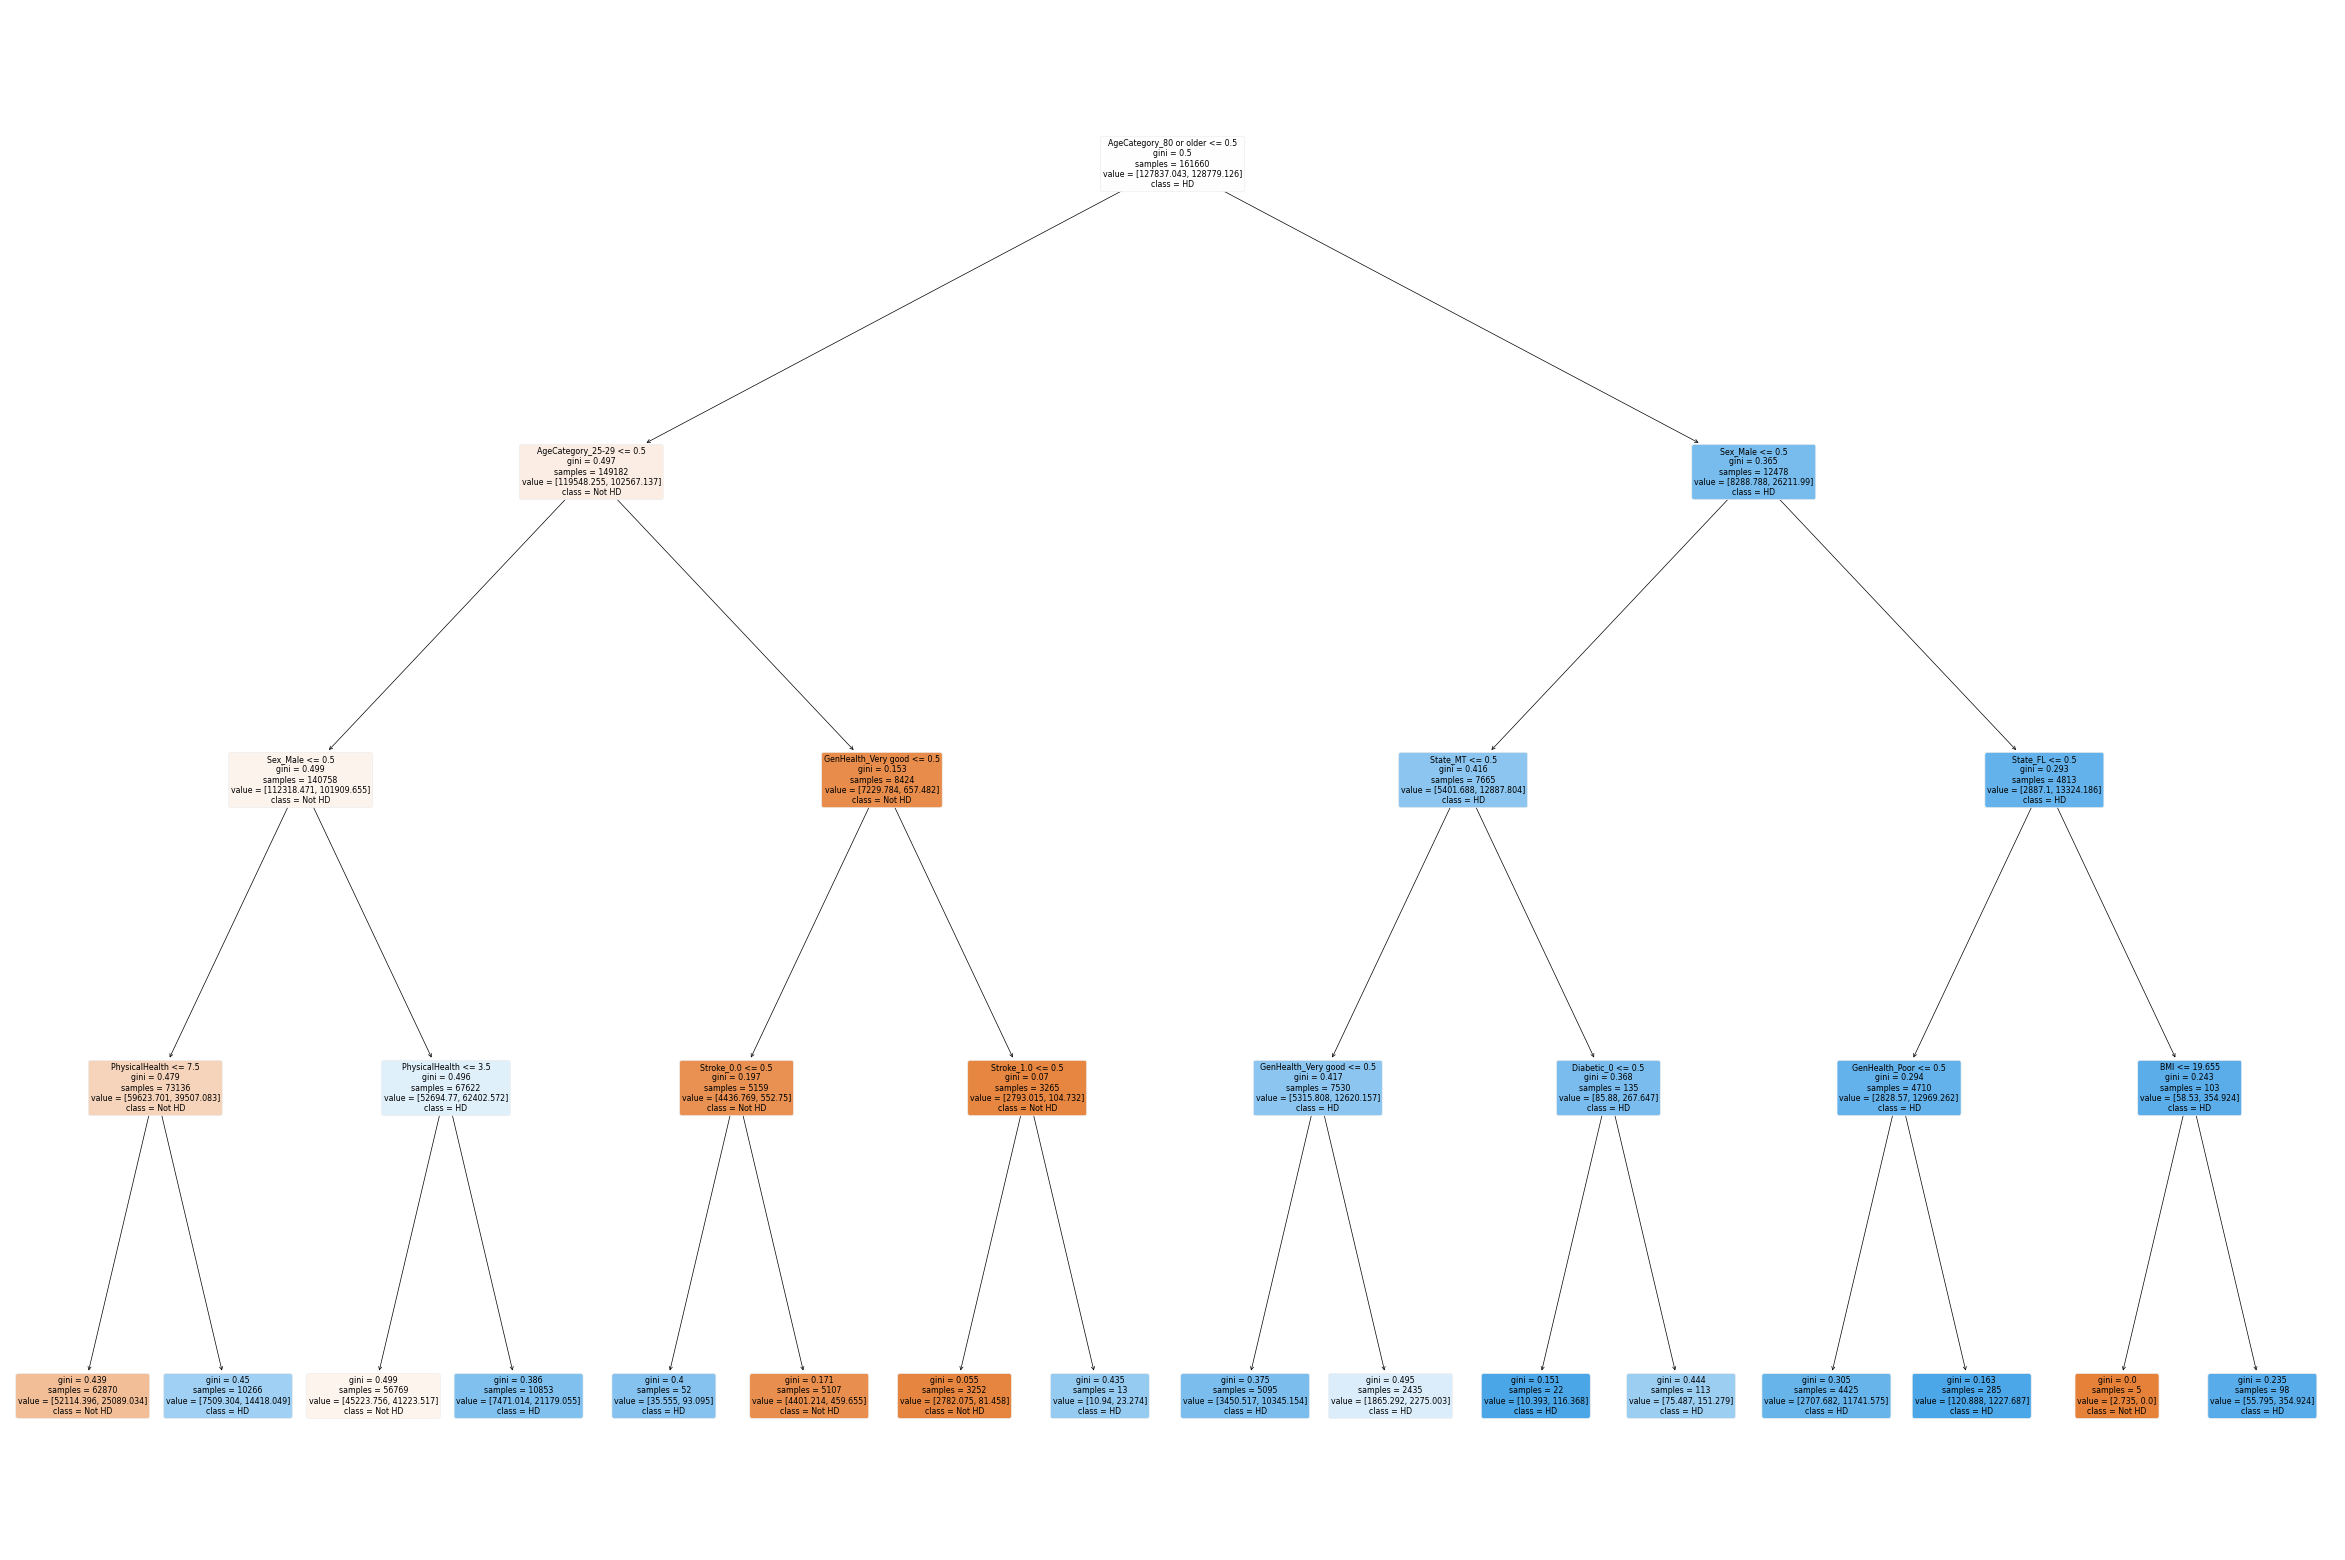

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(30, 20))
plot_tree(rf.estimators_[3], 
          class_names = ['Not HD', 'HD'], # HD= Heart Dicsiese
          feature_names=X_test.columns,
          filled=True, impurity=True, 
          rounded=True);

In [ ]:
top_features = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
top_features

DiffWalking                           0.13
Diabetic_1                            0.12
PhysicalHealth                        0.10
Stroke_1.0                            0.09
GenHealth_Fair                        0.07
Diabetic_0                            0.06
AgeCategory_80 or older               0.06
GenHealth_Excellent                   0.05
Stroke_0.0                            0.04
GenHealth_Poor                        0.04
Smoking_0                             0.03
Smoking_1                             0.03
GenHealth_Very good                   0.02
KidneyDisease                         0.02
AgeCategory_25-29                     0.02
Sex_Male                              0.01
Sex_Female                            0.01
AgeCategory_75-79                     0.01
AgeCategory_18-24                     0.01
SkinCancer_0.0                        0.01
PhysicalActivity_0                    0.01
PhysicalActivity_1                    0.01
AgeCategory_35-39                     0.01
AgeCategory

<AxesSubplot:>

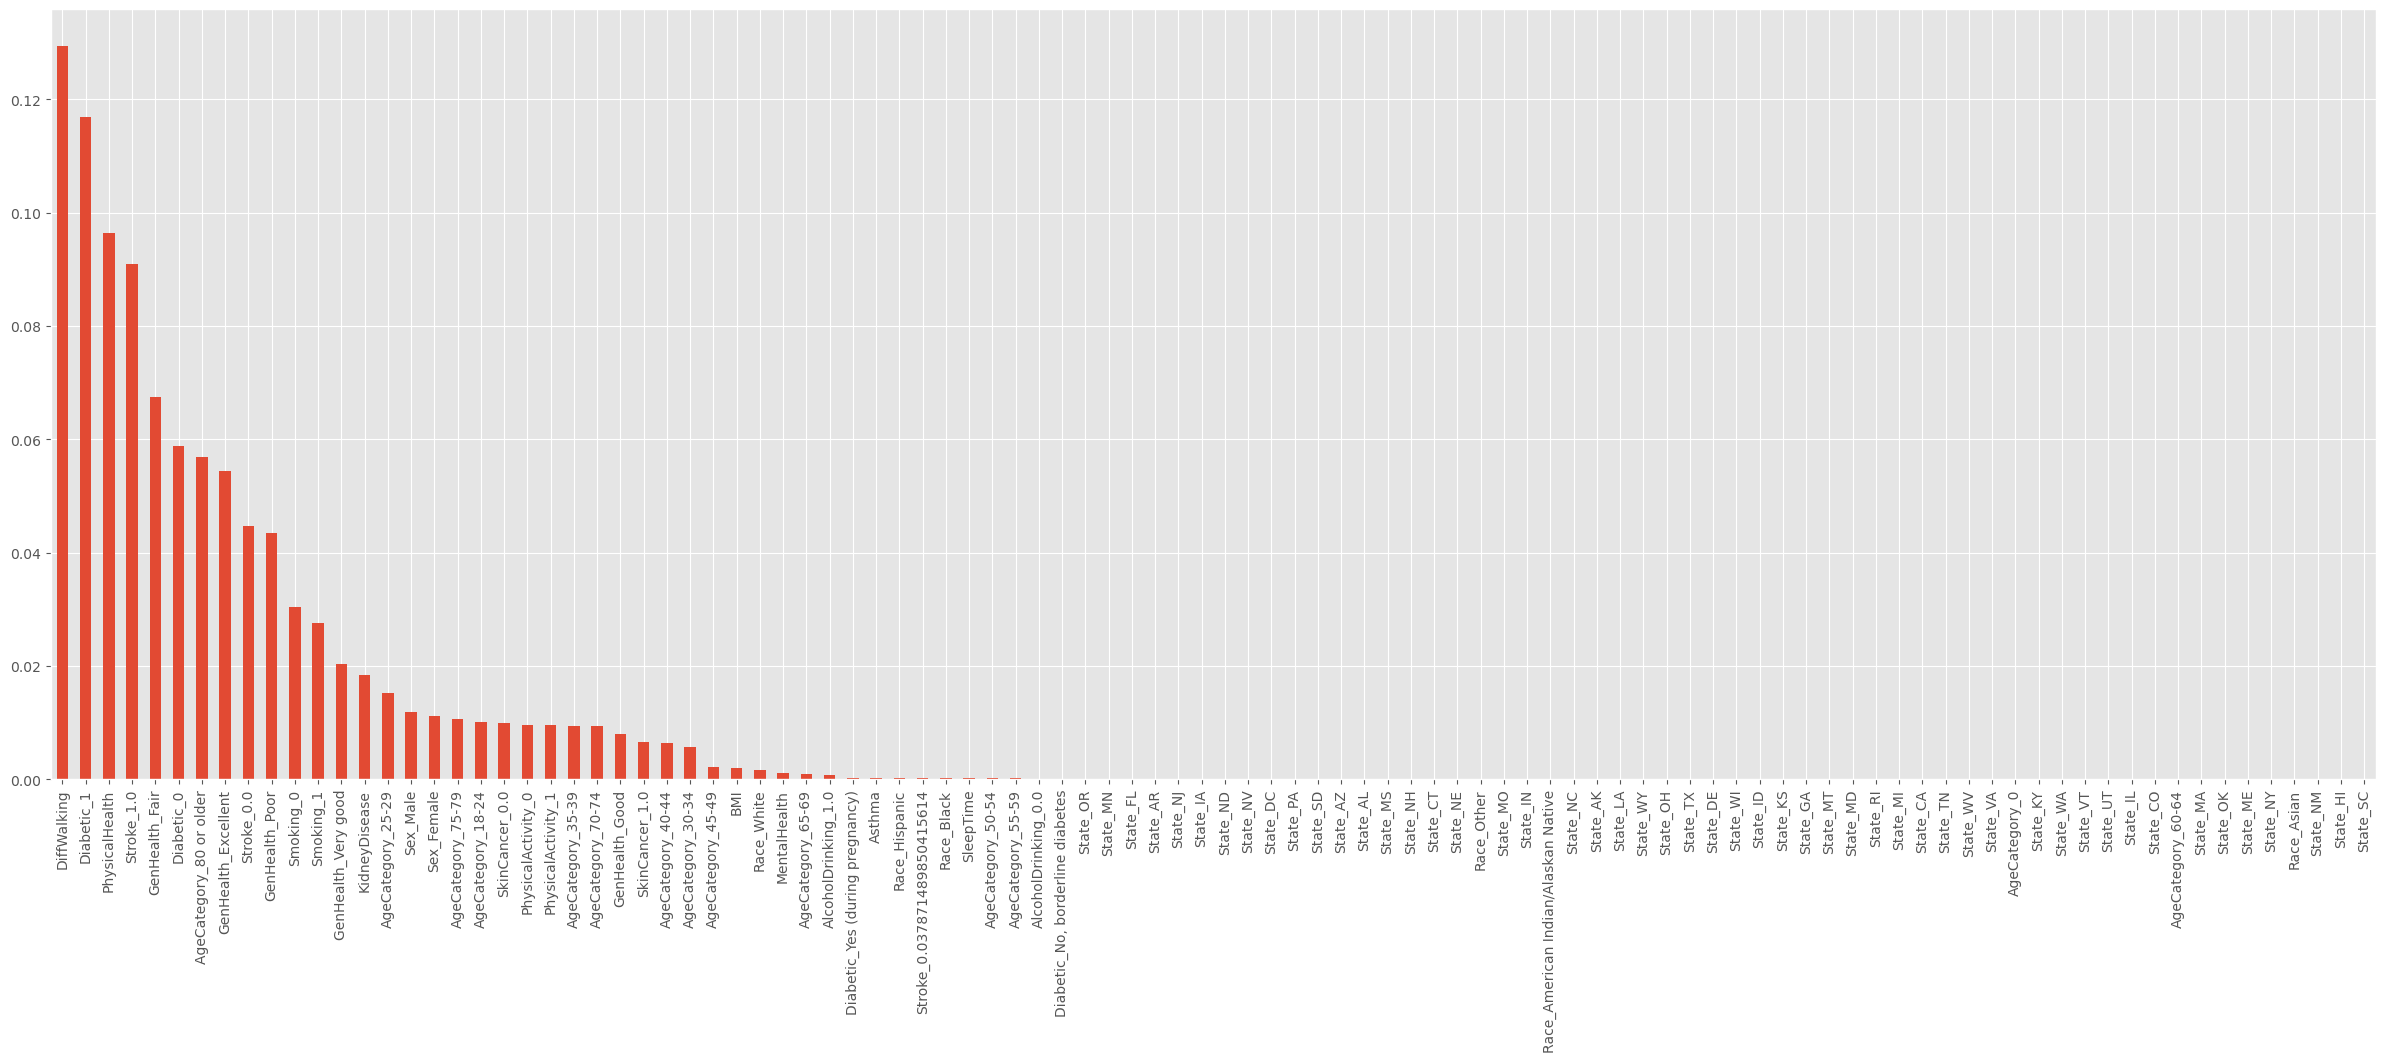

In [ ]:
plt.figure(figsize=(30,10))
top_features.plot(kind='bar')

***

### MLC4. Model evaluation<a class="anchor" id="model_evaluation"></a>

#### MLC4.1 Evaluation over train dataset
#### a) Get predictions for the train set of Radnom Forst

pred = predection 

In [ ]:
y_train_pred = pd.DataFrame(rf.predict(X_train), 
                            index=y_train.index, 
                            columns=['HD prediction'])

y_train_pred.head()

,HD prediction
0,1
1,1
2,1
3,0
4,1


In [ ]:
y_train.head()


,HeartDisease
0,0
1,0
2,0
3,0
4,0


In [ ]:
print(y_train_pred.shape)
print(y_train.shape)

(255836, 1)
(255836, 1)


In [ ]:
df_results = y_train.join(y_train_pred, how= 'inner')
df_results.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 255836 entries, 0 to 255835
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   HeartDisease   255836 non-null  int64
 1   HD prediction  255836 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB


In [ ]:
df_results['Success'] = (df_results['HeartDisease'] == df_results['HD prediction']).astype(int)
df_results.info()
df_results.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255836 entries, 0 to 255835
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   HeartDisease   255836 non-null  int64
 1   HD prediction  255836 non-null  int64
 2   Success        255836 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 14.9 MB


,HeartDisease,HD prediction,Success
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
5,1,1,1
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


When I am not sure about if my model doing good or not I would to go farther with confusion matrix to have more check

#### b) Confusion matrix

In [ ]:
confusion_matrix = pd.crosstab(df_results['HeartDisease'], df_results['HD prediction'])
confusion_matrix

HD prediction,0,1
HeartDisease,,
0,181178,52673
1,7221,14764


In [ ]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]
accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP+FP)
Recall = TP/(TP+FN)
print(accuracy)
print(Precision)
print(Recall)


0.7658890851952032
0.21893026083603956
0.6715487832613145


In [ ]:
pred_train = rf.predict(X_train)
confusion_matrix_m = metrics.confusion_matrix(y_train,pred_train)
tn, fp, fn, tp = confusion_matrix_m.ravel()

Accuracy_m = metrics.accuracy_score(y_train, pred_train)
Precision_m = metrics.precision_score(y_train,pred_train)
Recall_m = metrics.recall_score(y_train,pred_train)

print("Confusion matrix: ", confusion_matrix_m)
print(f"TN = {tn} - FP = {fp} - FN = {fn} - TP = {tp}")

print("Accuracy: ", Accuracy_m)
print("Precision: ", Precision_m)
print("Recall: ", Recall_m)

Confusion matrix:  [[181178  52673]
 [  7221  14764]]
TN = 181178 - FP = 52673 - FN = 7221 - TP = 14764
Accuracy:  0.7658890851952032
Precision:  0.21893026083603956
Recall:  0.6715487832613145


Observation:

From the total values of + predeciction 100% are getting HD ( it means my Model is Over fitting) or because we have unbalanced data set . 

But I would to go more farther and check the Evaluation over test dataset 


#### MLC4.2 Evaluation over test dataset
#### a) Get predictions for the test set

In [ ]:
y_test_pred = pd.DataFrame(rf.predict(X_test), index=y_test.index, columns=['HD prediction'])

In [ ]:
df_results_test = y_test.join(y_test_pred, how= 'inner')
df_results_test['Success'] = (df_results_test['HeartDisease'] == df_results_test['HD prediction']).astype(int)
df_results_test

,HeartDisease,HD prediction,Success
255836,0,0,1
255837,0,0,1
255838,0,0,1
255839,0,0,1
255840,0,1,0
...,...,...,...
319790,1,1,1
319791,0,0,1
319792,0,0,1
319793,0,0,1


In [ ]:

confusion_matrix_m_test = metrics.confusion_matrix(df_results_test['HeartDisease'],df_results_test['HD prediction'])

tn, fp, fn, tp = confusion_matrix_m_test.ravel()

Accuracy_m_test = metrics.accuracy_score(df_results_test['HeartDisease'], df_results_test['HD prediction'])
Precision_m_test = metrics.precision_score(df_results_test['HeartDisease'],df_results_test['HD prediction'])
Recall_m_test = metrics.recall_score(df_results_test['HeartDisease'],df_results_test['HD prediction'])
f1_m_test = metrics.f1_score(df_results_test['HeartDisease'],df_results_test['HD prediction'])

print("Confusion matrix: ", confusion_matrix_m_test)
print(f"TN = {tn} - FP = {fp} - FN = {fn} - TP = {tp}")
print("Accuracy: ", Accuracy_m_test)
print("Precision: ", Precision_m_test)
print("Recall: ", Recall_m_test)
print("F1 Score: ", f1_m_test)

Confusion matrix:  [[45298 13273]
 [ 1788  3600]]
TN = 45298 - FP = 13273 - FN = 1788 - TP = 3600
Accuracy:  0.764521021279257
Precision:  0.21335862028092217
Recall:  0.6681514476614699
F1 Score:  0.3234356048695027


### b) Check F1 score 

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86     58571
           1       0.21      0.67      0.32      5388

    accuracy                           0.76     63959
   macro avg       0.59      0.72      0.59     63959
weighted avg       0.90      0.76      0.81     63959



observation 

Since this value F1_score of HD is .32 isn’t very close to 1, it tells us that the model does a poor job of predicting 

### c) ROC curve

In [ ]:
metrics.roc_auc_score(df_results_test['HeartDisease'], df_results_test['HD prediction'])

0.7207687971946863

In [ ]:
fpr, tpr, _ = metrics.roc_curve(df_results_test['HeartDisease'], df_results_test['HD prediction'])

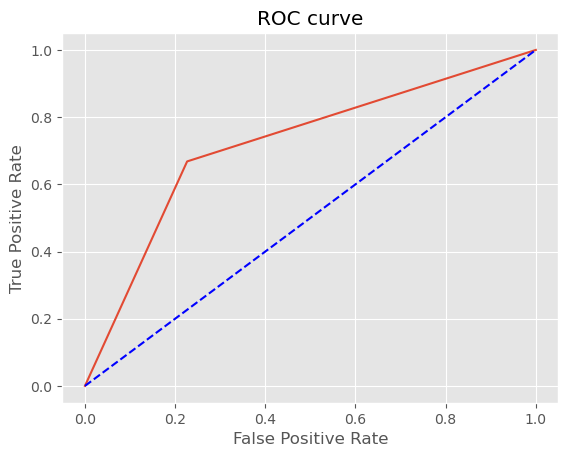

In [ ]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

observation 

Since this value F1_score of HD is .07 isn’t very close to 1, it tells us that the model does a poor job of predicting 
we will try to resample the date and try the model with resampled dataset

### Oversampling<a class="anchor" id="Oversampling"></a> 

In [ ]:
df_heart_res= df_heart_co.copy()
df_heart_res

NameError: name 'df_heart_co' is not defined

***

### 4.3.2. ENSEMBLE MODELS <a class="anchor" id="ensemble_models"></a>
#### a) Decision Tree model 

I chose Decision Tree because, one of the most Algo fits with unbalnced Dataset we have 


In [ ]:
dt= tree.DecisionTreeClassifier(random_state=42,max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

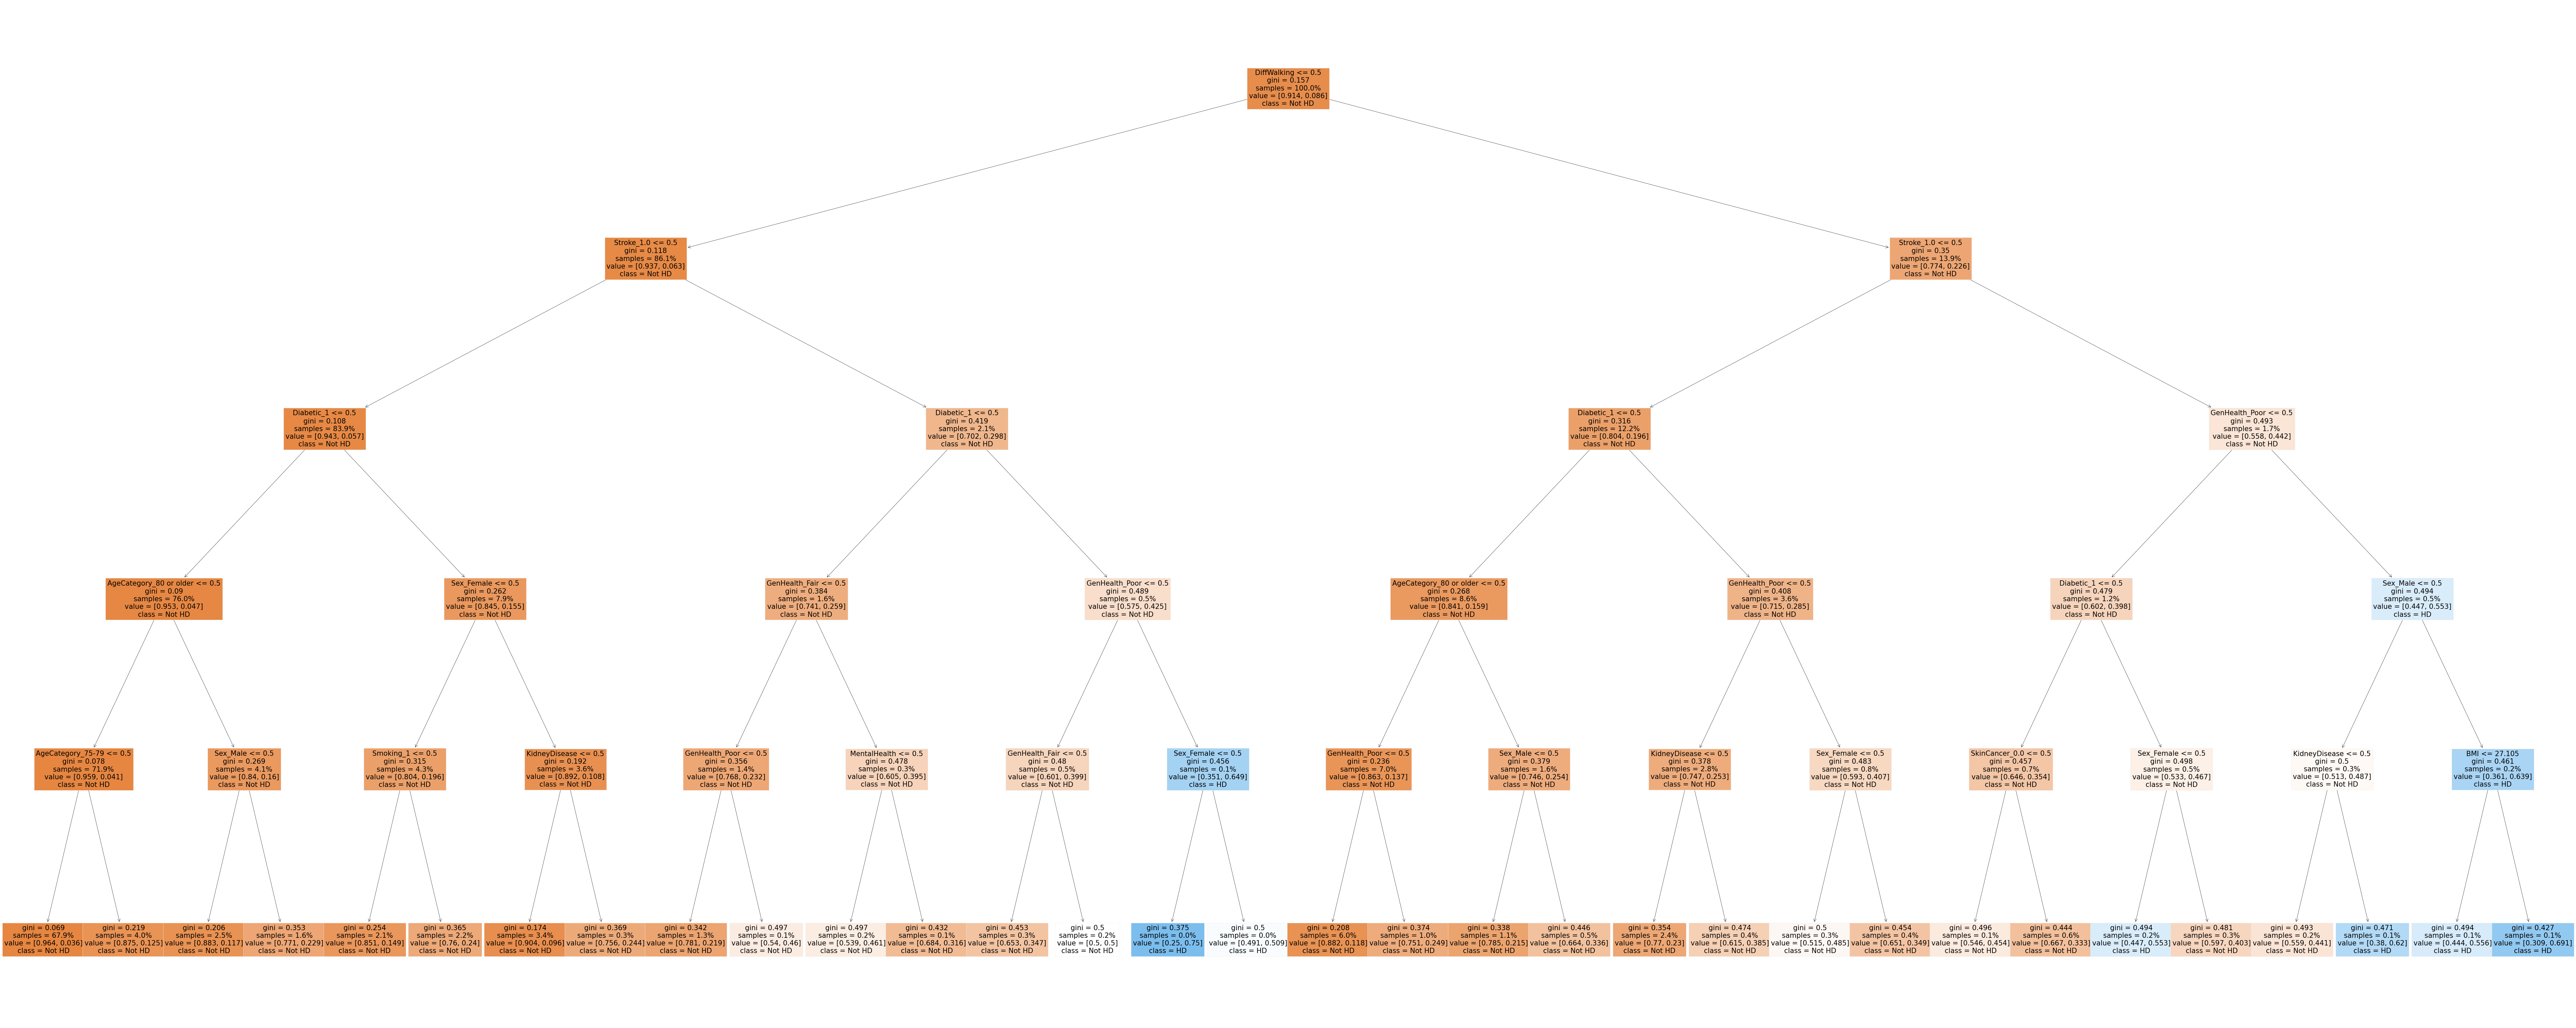

In [ ]:
fig, ax = plt.subplots(figsize=(100,40))
tree.plot_tree(dt, 
               ax = ax, 
               fontsize = 15,
               proportion=True,
               filled = True, 
               feature_names = X_test.columns,
               class_names = ['Not HD', 'HD'], # HD= Heart Dicsiese
);

In [ ]:
top_features_dt = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
top_features_dt

DiffWalking                           0.36
Stroke_1.0                            0.23
Diabetic_1                            0.15
AgeCategory_80 or older               0.08
GenHealth_Poor                        0.05
AgeCategory_75-79                     0.03
Sex_Female                            0.02
Sex_Male                              0.02
KidneyDisease                         0.02
Smoking_1                             0.01
GenHealth_Fair                        0.01
SkinCancer_0.0                        0.00
MentalHealth                          0.00
BMI                                   0.00
State_MO                              0.00
State_MN                              0.00
State_MD                              0.00
State_MI                              0.00
State_ME                              0.00
State_KY                              0.00
State_MA                              0.00
State_LA                              0.00
State_MT                              0.00
State_KS   

<AxesSubplot:>

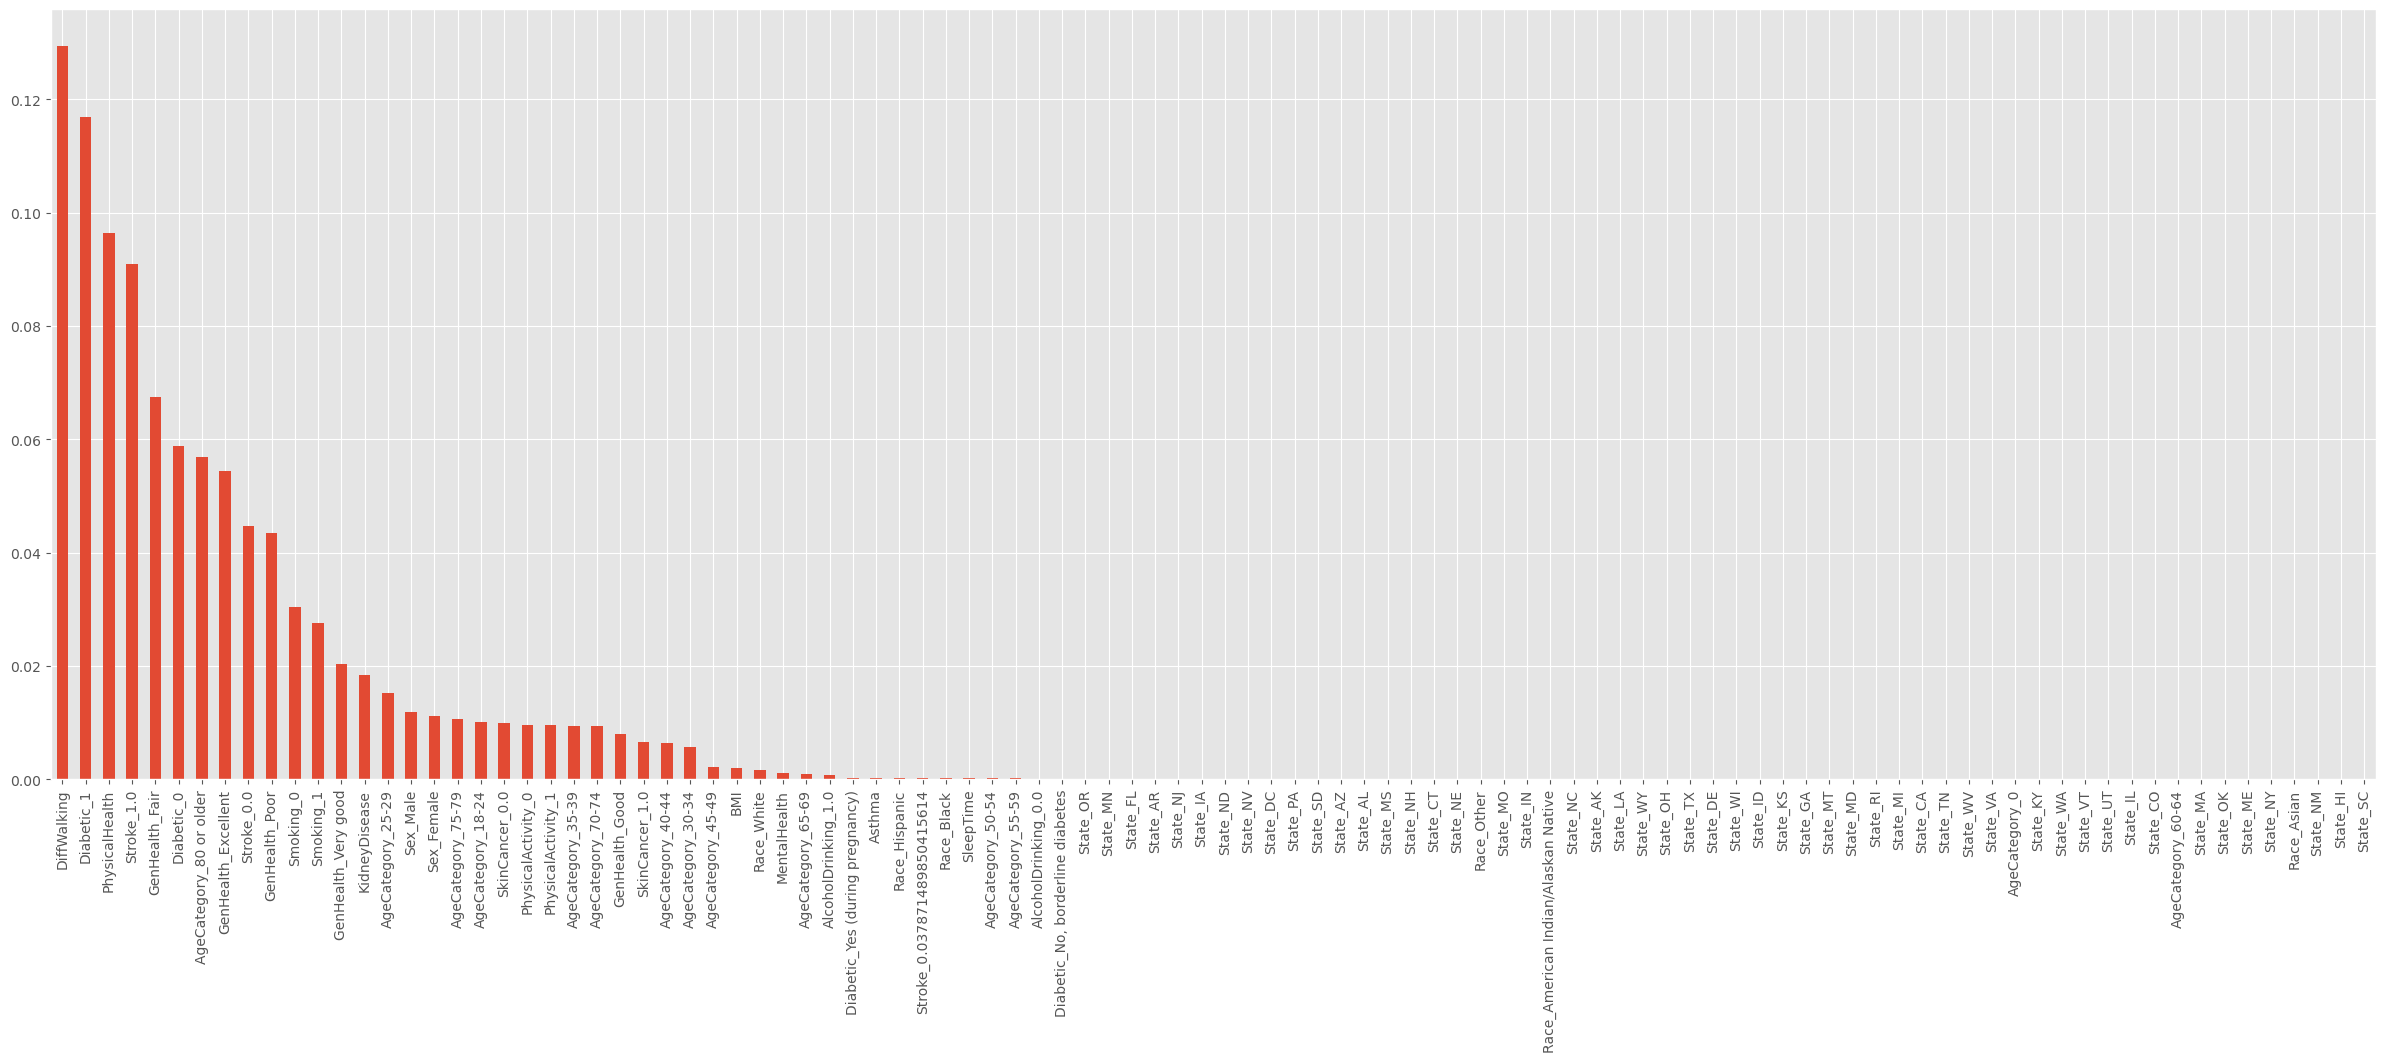

In [ ]:
plt.figure(figsize=(30,10))
top_features.plot(kind='bar')

### Model Evluation <a class="anchor" id="model_evaluation"></a>

a) using the Model

In [ ]:
dt_score_train=dt.score(X_train, y_train)
print('the accurancy of the DT scroe for train data is  ',dt_score_train)

the accurancy of the DT scroe for train data is   0.9151839459653841


b) Evaluation ove the test date

In [ ]:
dt_score_test= dt.score(X_test, y_test)
print('the accurancy of the DT scroe for train data is  ',dt_score_test)

the accurancy of the DT scroe for train data is   0.9168373489266561


### FINAL MODEL COMPARISON (Decison Tree vs Random Forest vs Gradient Boosting)

In [ ]:
Alg_models = [ 
    ('RandomForest', RandomForestClassifier(n_estimators=50, max_depth=4, random_state=42)),
    ('DecisionTree', DecisionTreeClassifier(max_depth=4, random_state=42)),
]

ROC AUC Score for RandomForest: 0.8055036205843713
ROC AUC Score for DecisionTree: 0.7259133443167733


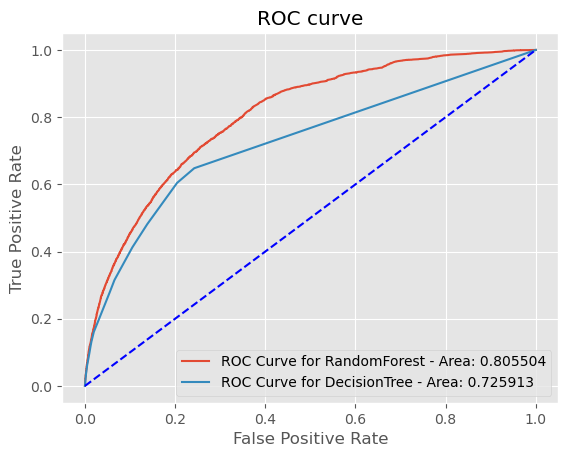

In [ ]:
plt.clf()
for z in Alg_models:
    model_name = z[0]
    model_instance = z[1]
    model_instance.fit(X_train,np.ravel(y_train))
    predictions = model_instance.predict_proba(X_test)[:,1]
    auc_score = metrics.roc_auc_score(y_test, predictions)
    print('ROC AUC Score for {}: {}'.format(model_name, auc_score))
    fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label='ROC Curve for {} - Area: {:2f}'.format(model_name, auc_score))


plt.plot([0, 1], [0, 1], color='Blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

## Summery:

    As showen on Above ROC curve we see between the Random Forst and Decision Tree
    That Random Forst more Accuret . 

Hints:
     we have not tried the Random Forst with Oversampling data 

    As well other Algo. could be reach more better performce as KNeighborsClassifier  

I am still trying diff. Algo after this submition to know which one more better for this task 
I am looking ofr the answer of this task 

# Thanks alot Pedro for your time, effort, support. looking for word for your feedback